## 🎯 Expected Goals (xG) Analysis

### Key Research Questions:
- ✅ Which team had the **highest xG** and scored the most goals?
- ✅ Which game had the **highest combined xG** (xG + opp_xG)?
- ✅ Which game had the **biggest difference** between xG and actual goals?
- ✅ Were there any **significant xG trends** or series?
- ✅ How have **average and median xG** changed across seasons?
- ✅ xG comparison **with and without penalties**

### Visualizations:
- 📈 Line plots: xG trends over seasons
- 📊 Bar charts: Teams with biggest xG vs goals difference
- 🔵 Density plot: xG vs actual goals scored
- 📉 Scatter plot: xG overperformance/underperformance

---

In [109]:
import pandas as pd

df = pd.read_parquet('data/serie_a_matches_processed.parquet')

df.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,opp captain,opp sh,opp sot,opp dist,opp fk,opp pk,opp pkatt
1946,2020-09-20,18:00,Serie A,1,Sun,Home,D,1,1,Cagliari,...,0,2020,Sassuolo,João Pedro,8,4,15.9,1,0,0
1947,2020-09-20,15:00,Serie A,1,Sun,Home,W,4,1,Crotone,...,0,2020,Genoa,Alex Cordaz,13,3,18.8,0,0,0
1948,2020-09-20,12:30,Serie A,1,Sun,Home,L,0,2,Napoli,...,0,2020,Parma,Lorenzo Insigne,17,6,19.4,0,0,0
1949,2020-09-19,20:45,Serie A,1,Sat,Home,W,3,0,Roma,...,0,2020,Hellas Verona,Lorenzo Pellegrini,21,4,NaN,0,0,0
1950,2020-09-19,18:00,Serie A,1,Sat,Home,W,1,0,Torino,...,0,2020,Fiorentina,Andrea Belotti,6,3,18.7,1,0,0


## ✅ Implementation (season-based, fully commented)
This section implements every research point above with clear, season-focused analysis and readable visualizations.

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 0) Basic preparation
# -----------------------------
# Make plots readable in notebooks
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13

# Handle round = 0 (playoffs) by excluding, as requested in earlier notebook
if 'round' in df.columns:
    df = df[df['round'] > 0]

# Exclude season 2025 (still in progress, incomplete data)
df = df[df['season'] != 2025]

# Make sure date is parsed for time series analysis
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sanity check: how many seasons?
seasons = sorted(df['season'].dropna().unique())
print(f"Seasons available: {seasons}")
print(f"Rows: {len(df):,}")
print(f"Note: Season 2025 excluded (still in progress)")

# Helper: choose a season for focused examples (latest complete season)
season_focus = seasons[-1]
print(f"Using season_focus = {season_focus}")

Seasons available: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Rows: 1,900
Note: Season 2025 excluded (still in progress)
Using season_focus = 2024


In [111]:
from helpers.season_table import load_season_tables

season_tables = load_season_tables()

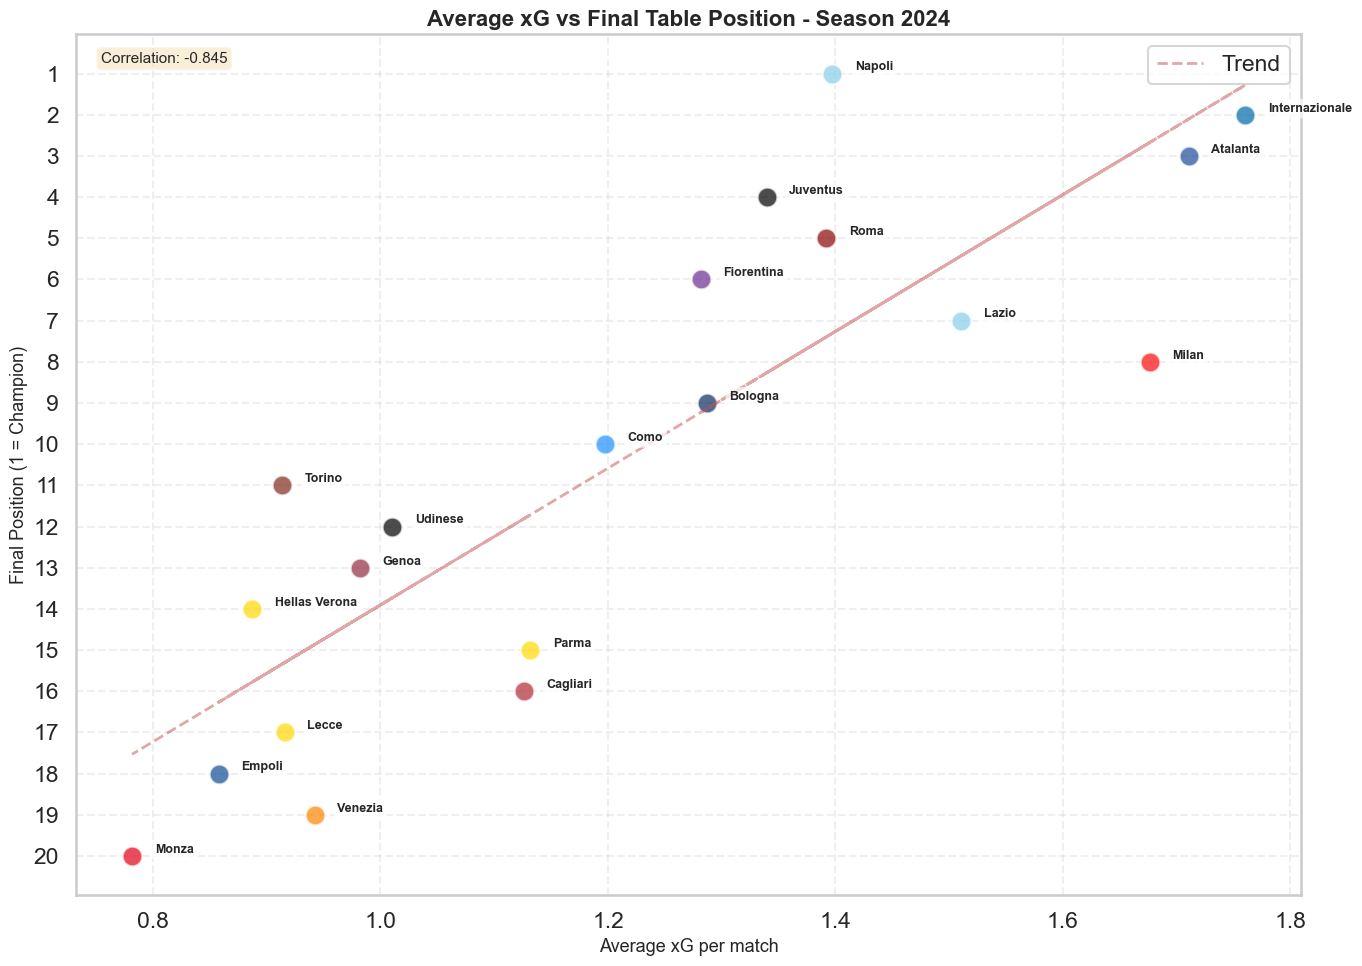


Correlation between avg xG and final position: -0.845
(Negative correlation = higher xG leads to better position)


In [112]:
# Visualization with team crests
# Note: This creates a scatter plot for a specific season with team names as labels
# For actual team crests, you would need team logo images

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Define team colors (primary club colors)
team_colors = {
    'Napoli': '#87CEEB',           # Sky blue
    'Internazionale': '#0068A8',   # Inter blue
    'Atalanta': '#1E4A99',         # Atalanta blue
    'Juventus': '#000000',         # Black
    'Roma': '#8B0304',             # Roma red
    'Lazio': '#87CEEB',            # Sky blue
    'Milan': '#FB090B',            # Rossonero red
    'Fiorentina': '#6B2C91',       # Viola purple
    'Bologna': '#0A2A5E',          # Bologna blue
    'Torino': '#7F2A1E',           # Granata maroon
    'Como': '#1E90FF',             # Blue
    'Udinese': '#000000',          # Black
    'Genoa': '#922B3C',            # Genoa red
    'Hellas Verona': '#FFD700',    # Yellow
    'Parma': '#FFDB00',            # Yellow
    'Cagliari': '#B02A35',         # Cagliari red
    'Lecce': '#FFD700',            # Yellow
    'Empoli': '#0E4C92',           # Blue
    'Venezia': '#FF8300',          # Orange
    'Monza': '#E2001A',            # Red
    'Sassuolo': '#009B4D',         # Green
    'Sampdoria': '#003C7F',        # Blucerchiato blue
    'Salernitana': '#8B0000',      # Dark red
    'Spezia': '#000000',           # Black
    'Crotone': '#0033A0',          # Blue
    'Benevento': '#FFD700',        # Yellow
    'Spal': '#1E4A99',             # Blue
}

# Select a season to visualize
viz_season = season_focus

# Get data for selected season
season_viz = season_tables[viz_season][38].copy()

# season_viz = position_vs_xg[position_vs_xg['season'] == viz_season].copy()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Plot points with team names as labels
for _, row in season_viz.iterrows():
    # Get team color, default to steelblue if not found
    team_color = team_colors.get(row['team'], 'steelblue')
    
    ax.scatter(row['xg_for'] / 38.0, row['pos'], s=200, alpha=0.7, color=team_color, 
               zorder=2, edgecolors='white', linewidths=1.5)
    # Offset text to the right and slightly up for better visibility
    ax.text(row['xg_for'] / 38.0 + 0.02, row['pos'] - 0.15, row['team'], 
            fontsize=9, ha='left', va='center', weight='bold', zorder=3,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='none', alpha=0.7))

# Invert y-axis so position 1 is at the top
ax.invert_yaxis()

# Set Y-axis to show integer values from 1 to 20
ax.set_yticks(range(1, 21))

# Add grid and labels
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlabel('Average xG per match', fontsize=13)
ax.set_ylabel('Final Position (1 = Champion)', fontsize=13)
ax.set_title(f'Average xG vs Final Table Position - Season {viz_season}', fontsize=16, weight='bold')

# Add trend line
z = np.polyfit(season_viz['xg_for'] / 38.0, season_viz['pos'], 1)
p = np.poly1d(z)
ax.plot(season_viz['xg_for'] / 38.0, p(season_viz['xg_for'] / 38.0), "r--", alpha=0.5, linewidth=2, label='Trend')

# Add correlation coefficient
corr = season_viz['xg_for'].corr(season_viz['pos'])
ax.text(0.02, 0.98, f'Correlation: {corr:.3f}', 
        transform=ax.transAxes, fontsize=11, va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.legend()
plt.tight_layout()
plt.show()

print(f"\nCorrelation between avg xG and final position: {corr:.3f}")
print("(Negative correlation = higher xG leads to better position)")

### 1️⃣ Which team had the highest xG and scored the most goals?

Top xG team per season:
    season            team  xg_total  goals_total
0     2020        Atalanta      74.5           90
27    2021  Internazionale      81.4           84
46    2022  Internazionale      68.2           71
68    2023  Internazionale      78.1           89
88    2024  Internazionale      66.9           79

Top goals team per season:
    season            team  goals_total  xg_total
0     2020        Atalanta           90      74.5
27    2021  Internazionale           84      81.4
52    2022          Napoli           77      64.7
68    2023  Internazionale           89      78.1
88    2024  Internazionale           79      66.9


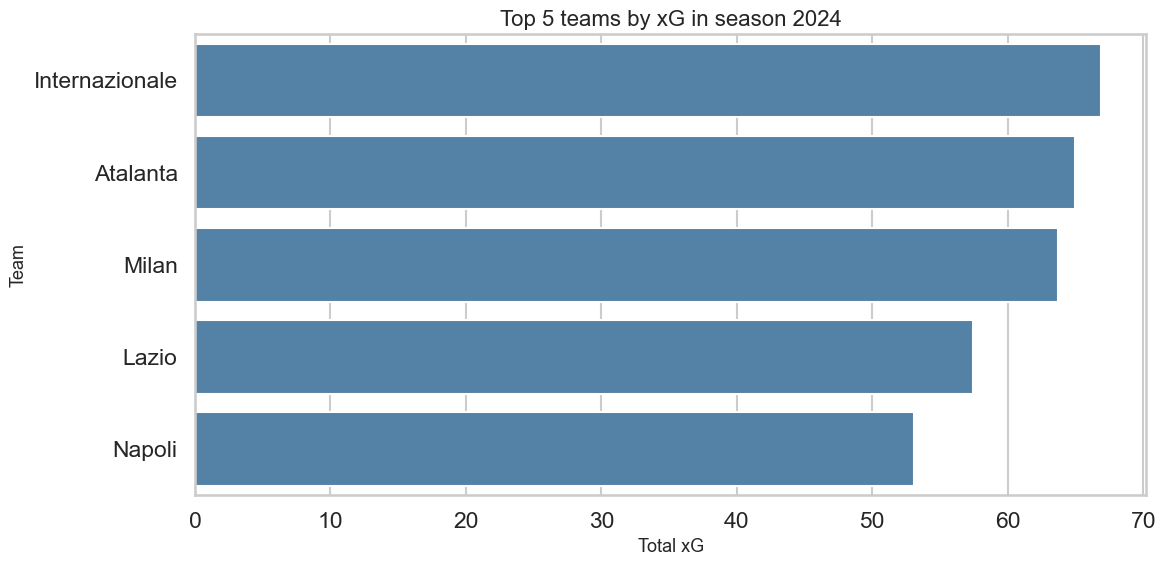

In [113]:
# Approach: aggregate by season and team, accounting for both home and away matches
# Since each row represents one match from home perspective:
# - When team is 'home': use xg, gf, sh, sot, etc.
# - When team is 'away' (opponent): use xga, ga, opp sh, opp sot, etc.

# Home matches aggregation
home_stats = (
    df.groupby(['season', 'team'], as_index=False)
      .agg(
          xg_home=('xg', 'sum'),
          goals_home=('gf', 'sum'),
          matches_home=('team', 'count')
      )
)

# Away matches aggregation (when team is the opponent)
away_stats = (
    df.groupby(['season', 'opponent'], as_index=False)
      .agg(
          xg_away=('xga', 'sum'),
          goals_away=('ga', 'sum'),
          matches_away=('opponent', 'count')
      )
      .rename(columns={'opponent': 'team'})
)

# Combine home and away stats
team_season = home_stats.merge(away_stats, on=['season', 'team'], how='outer').fillna(0)
team_season['xg_total'] = team_season['xg_home'] + team_season['xg_away']
team_season['goals_total'] = team_season['goals_home'] + team_season['goals_away']
team_season['matches'] = team_season['matches_home'] + team_season['matches_away']

# Keep only essential columns
team_season = team_season[['season', 'team', 'xg_total', 'goals_total', 'matches']]

# Top xG team per season
top_xg_by_season = (
    team_season.sort_values(['season', 'xg_total'], ascending=[True, False])
               .groupby('season')
               .head(1)
)

# Top goals team per season
top_goals_by_season = (
    team_season.sort_values(['season', 'goals_total'], ascending=[True, False])
               .groupby('season')
               .head(1)
)

print("Top xG team per season:")
print(top_xg_by_season[['season', 'team', 'xg_total', 'goals_total']])

print("\nTop goals team per season:")
print(top_goals_by_season[['season', 'team', 'goals_total', 'xg_total']])

# Visualization: Top 5 teams by xG for the selected season
season_top5_xg = (
    team_season[team_season['season'] == season_focus]
    .sort_values('xg_total', ascending=False)
    .head(5)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=season_top5_xg, x='xg_total', y='team', color='steelblue')
plt.title(f"Top 5 teams by xG in season {season_focus}")
plt.xlabel("Total xG")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [114]:
season_summary = (
    team_season.sort_values(['xg_total'], ascending=[False])
               .groupby('season')
               .head(5)
)

print("Top 5 Highest xG per season in the last 5 years")
print(season_summary[['season', 'team', 'xg_total', 'goals_total', 'matches']])

Top 5 Highest xG per season in the last 5 years
    season            team  xg_total  goals_total  matches
27    2021  Internazionale      81.4           84       38
68    2023  Internazionale      78.1           89       38
0     2020        Atalanta      74.5           90       38
9     2020        Juventus      74.3           77       38
8     2020  Internazionale      74.2           89       38
11    2020           Milan      70.7           74       38
46    2022  Internazionale      68.2           71       38
12    2020          Napoli      67.8           86       38
88    2024  Internazionale      66.9           79       38
72    2023           Milan      66.2           76       38
32    2021            Roma      65.2           59       38
80    2024        Atalanta      65.0           78       38
52    2022          Napoli      64.7           77       38
92    2024           Milan      63.7           61       38
20    2021        Atalanta      62.3           65       38
74    20

### Overperforming xG (2024 season)

/var/folders/2f/ljz1r9416b1fr4bg0p4bd8p00000gn/T/ipykernel_44236/3958145665.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_top_over, x='overperf', y='team',
/var/folders/2f/ljz1r9416b1fr4bg0p4bd8p00000gn/T/ipykernel_44236/3958145665.py:11: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(data=season_top_over, x='overperf', y='team',


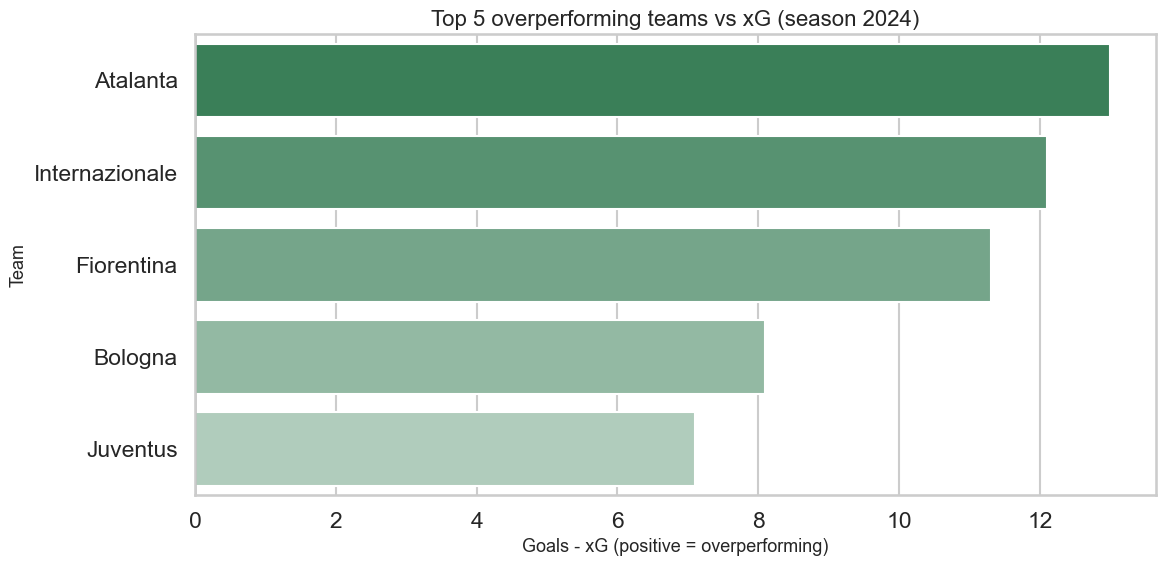


Top overperformers in season 2024:
              team  goals_total  xg_total  overperf
80        Atalanta           78      65.0      13.0
88  Internazionale           79      66.9      12.1
85      Fiorentina           60      48.7      11.3
81         Bologna           57      48.9       8.1
89        Juventus           58      50.9       7.1


In [132]:
team_overperf = team_season.copy()
team_overperf['overperf'] = team_overperf['goals_total'] - team_overperf['xg_total']

season_top_over = (
    team_overperf[team_overperf['season'] == season_focus]
    .sort_values('overperf', ascending=False)
    .head(5)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=season_top_over, x='overperf', y='team', 
            palette=sns.light_palette('seagreen', n_colors=7, reverse=True))
plt.title(f"Top 5 overperforming teams vs xG (season {season_focus})")
plt.xlabel("Goals - xG (positive = overperforming)")
plt.ylabel("Team")
plt.axvline(0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

print(f"\nTop overperformers in season {season_focus}:")
print(season_top_over[['team', 'goals_total', 'xg_total', 'overperf']])

/var/folders/2f/ljz1r9416b1fr4bg0p4bd8p00000gn/T/ipykernel_44236/2974003881.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_top_under, x='underperf', y='team',
/var/folders/2f/ljz1r9416b1fr4bg0p4bd8p00000gn/T/ipykernel_44236/2974003881.py:13: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(data=season_top_under, x='underperf', y='team',


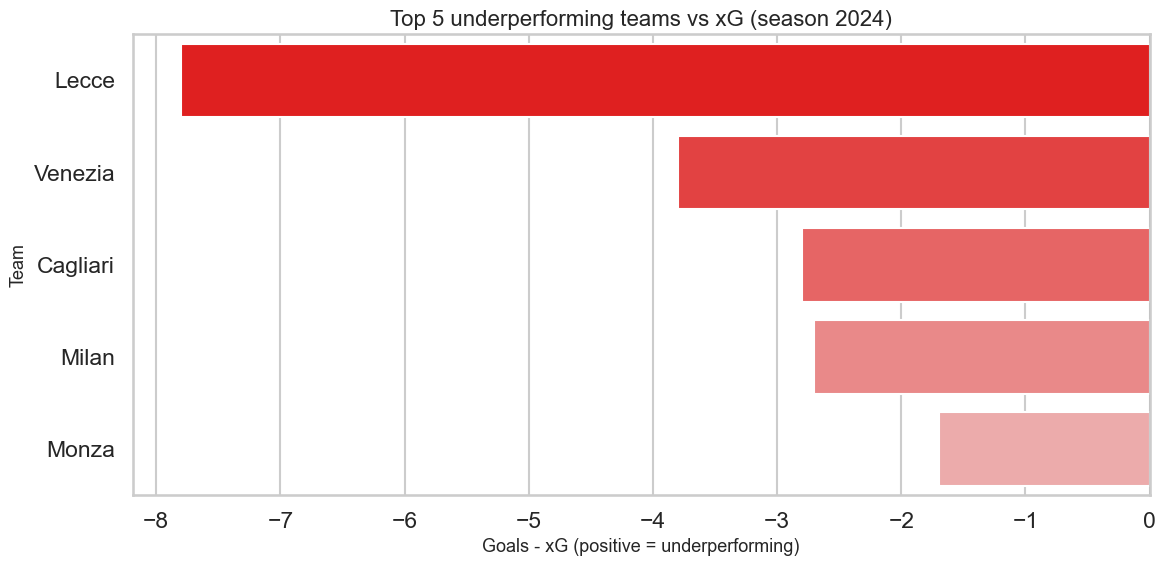


Top underperformers in season 2024:
        team  goals_total  xg_total  underperf
91     Lecce           27      34.8       -7.8
99   Venezia           32      35.8       -3.8
82  Cagliari           40      42.8       -2.8
92     Milan           61      63.7       -2.7
93     Monza           28      29.7       -1.7


In [133]:
# underperforming xG

team_underperf = team_season.copy()
team_underperf['underperf'] = team_underperf['goals_total'] - team_underperf['xg_total']

season_top_under = (
    team_underperf[team_underperf['season'] == season_focus]
			.sort_values('underperf', ascending=True)
    	.head(5)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=season_top_under, x='underperf', y='team', 
            palette=sns.light_palette('red', n_colors=7, reverse=True))
plt.title(f"Top 5 underperforming teams vs xG (season {season_focus})")
plt.xlabel("Goals - xG (positive = underperforming)")
plt.ylabel("Team")
plt.axvline(0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()

print(f"\nTop underperformers in season {season_focus}:")
print(season_top_under[['team', 'goals_total', 'xg_total', 'underperf']])

### 8️⃣ Over/underperformance scatter plot

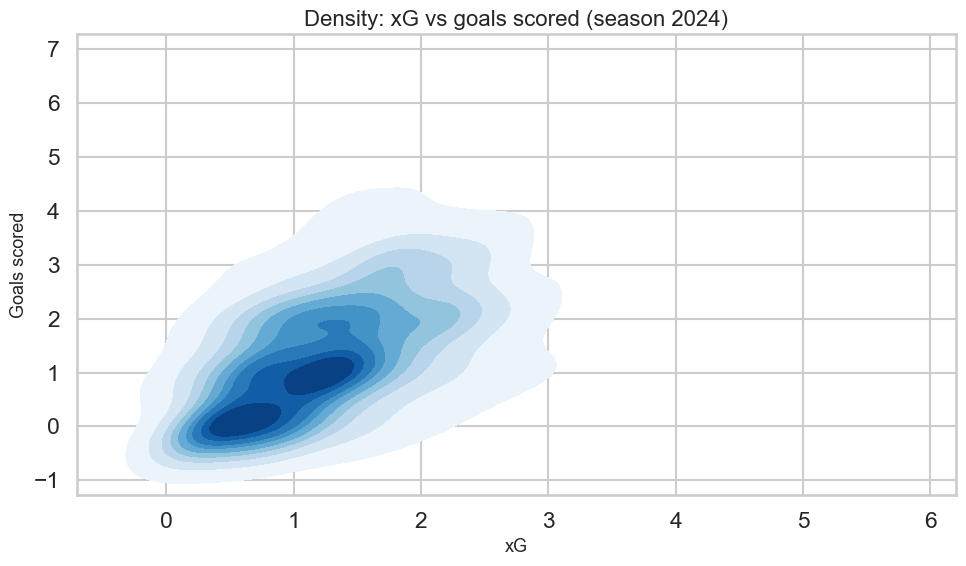

In [117]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df[df['season'] == season_focus],
    x='xg',
    y='gf',
    fill=True,
    cmap='Blues',
    thresh=0.05,
    levels=10
)
plt.title(f"Density: xG vs goals scored (season {season_focus})")
plt.xlabel("xG")
plt.ylabel("Goals scored")
plt.tight_layout()
plt.show()

### 🏆 Average xG vs Final Table Position

### 🏠🛫 Home vs Away xG Distribution (Histogram)

📊 xG Distribution Only:


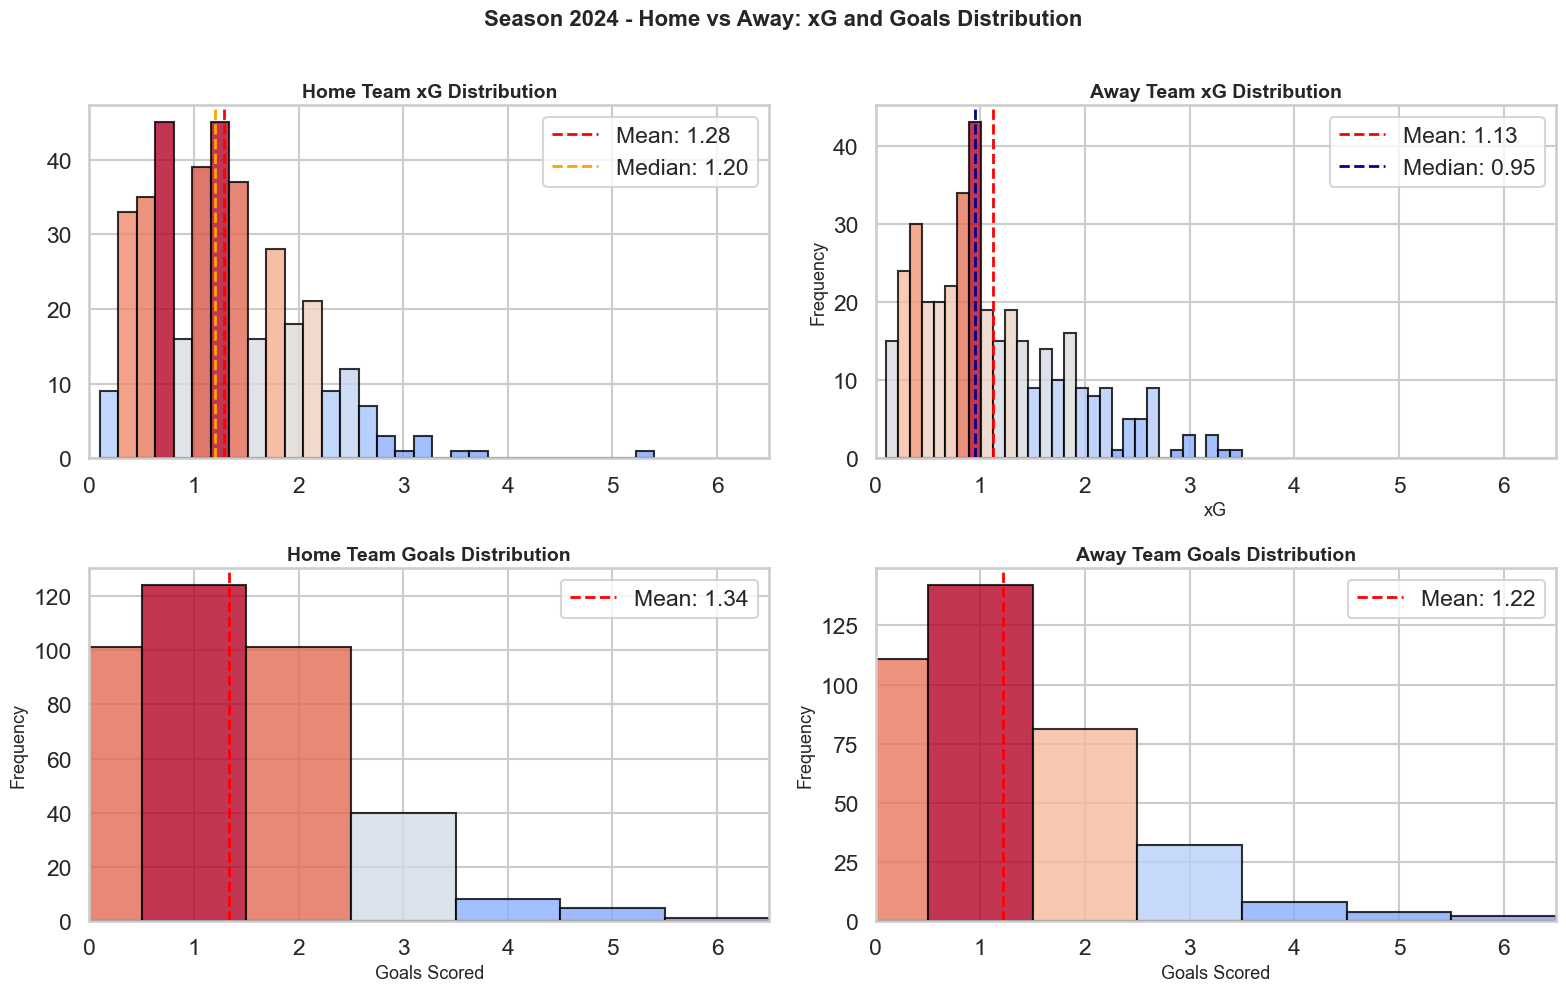


Season 2024 - Summary Statistics

Home Team xG:
  Mean:   1.284
  Median: 1.200
  Std:    0.718

Away Team xG:
  Mean:   1.126
  Median: 0.950
  Std:    0.705

Home Team Goals:
  Mean:   1.339
  Median: 1.000

Away Team Goals:
  Mean:   1.221
  Median: 1.000

Home Advantage (xG difference): 0.159
Home Advantage (goals difference): 0.118



In [134]:
def plot_home_away_distribution(season, show_goals=False):
    """
    Plot xG distribution for home and away teams for a given season.
    
    Parameters:
    -----------
    season : int
        The season to analyze (e.g., 2024)
    show_goals : bool
        If True, also show goals distribution alongside xG
    """
    season_df = df[df['season'] == season].copy()
    
    if show_goals:
        # Create 2x2 subplot: xG and goals for home and away
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Calculate common x-axis limits for each column
        home_max = max(season_df['xg'].max(), season_df['gf'].max())
        away_max = max(season_df['xga'].max(), season_df['ga'].max())
        
        # Home xG distribution with gradient
        n, bins, patches = axes[0, 0].hist(season_df['xg'], bins=30, alpha=0.8, edgecolor='black')
        # Color bars with gradient (cooler to warmer based on frequency)
        cmap_home_xg = plt.cm.coolwarm
        max_freq = max(n)
        for count, patch in zip(n, patches):
            patch.set_facecolor(cmap_home_xg(0.2 + 0.8 * count / max_freq))
        axes[0, 0].axvline(season_df['xg'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {season_df["xg"].mean():.2f}')
        axes[0, 0].axvline(season_df['xg'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {season_df["xg"].median():.2f}')
        axes[0, 0].set_title('Home Team xG Distribution', fontsize=14, weight='bold')
        axes[0, 0].set_xlim(0, home_max + 0.5)
        axes[0, 0].legend()
        
        # Away xG distribution with gradient
        n, bins, patches = axes[0, 1].hist(season_df['xga'], bins=30, alpha=0.8, edgecolor='black')
        # Color bars with gradient (cooler to warmer based on frequency)
        cmap_away_xg = plt.cm.coolwarm
        max_freq = max(n)
        for count, patch in zip(n, patches):
            patch.set_facecolor(cmap_away_xg(0.2 + 0.8 * count / max_freq))
        axes[0, 1].axvline(season_df['xga'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {season_df["xga"].mean():.2f}')
        axes[0, 1].axvline(season_df['xga'].median(), color='darkblue', linestyle='--', linewidth=2, label=f'Median: {season_df["xga"].median():.2f}')
        axes[0, 1].set_title('Away Team xG Distribution', fontsize=14, weight='bold')
        axes[0, 1].set_xlabel('xG')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].legend()
        axes[0, 1].set_xlim(0, away_max + 0.5)
        
        n, bins, patches = axes[1, 0].hist(season_df['gf'], bins=np.arange(-0.5, int(season_df['gf'].max()) + 1.5, 1.0), alpha=0.8, edgecolor='black')
        cmap_home_goals = plt.cm.coolwarm
        max_freq = max(n)
        for count, patch in zip(n, patches):
            patch.set_facecolor(cmap_home_goals(0.2 + 0.8 * count / max_freq))
        axes[1, 0].axvline(season_df['gf'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {season_df["gf"].mean():.2f}')
        axes[1, 0].set_title('Home Team Goals Distribution', fontsize=14, weight='bold')
        axes[1, 0].set_xlabel('Goals Scored')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].legend()
        axes[1, 0].set_xlim(0, home_max + 0.5)
        
        n, bins, patches = axes[1, 1].hist(season_df['ga'], bins=np.arange(-0.5, int(season_df['ga'].max()) + 1.5, 1.0), alpha=0.8, edgecolor='black')
        cmap_away_goals = plt.cm.coolwarm
        max_freq = max(n)
        for count, patch in zip(n, patches):
            patch.set_facecolor(cmap_away_goals(0.2 + 0.8 * count / max_freq))
        axes[1, 1].axvline(season_df['ga'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {season_df["ga"].mean():.2f}')
        axes[1, 1].set_title('Away Team Goals Distribution', fontsize=14, weight='bold')
        axes[1, 1].set_xlabel('Goals Scored')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].legend()
        axes[1, 1].set_xlim(0, away_max + 0.5)
        
        plt.suptitle(f'Season {season} - Home vs Away: xG and Goals Distribution', fontsize=16, weight='bold', y=1.00)
        
    else:
        # Create side-by-side comparison for xG only
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Home xG distribution with gradient (cooler to warmer based on frequency)
        n, bins, patches = axes[0].hist(season_df['xg'], bins=30, alpha=0.8, edgecolor='black')
        cmap_home = plt.cm.coolwarm
        max_freq = max(n)
        for count, patch in zip(n, patches):
            patch.set_facecolor(cmap_home(0.2 + 0.8 * count / max_freq))
        axes[0].axvline(season_df['xg'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {season_df["xg"].mean():.2f}')
        axes[0].axvline(season_df['xg'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {season_df["xg"].median():.2f}')
        axes[0].set_title('Home Team xG Distribution', fontsize=14, weight='bold')
        axes[0].set_xlabel('xG')
        axes[0].set_ylabel('Frequency')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        # Away xG distribution with gradient (cooler to warmer based on frequency)
        n, bins, patches = axes[1].hist(season_df['xga'], bins=30, alpha=0.8, edgecolor='black')
        cmap_away = plt.cm.coolwarm
        max_freq = max(n)
        for count, patch in zip(n, patches):
            patch.set_facecolor(cmap_away(0.2 + 0.8 * count / max_freq))
        axes[1].axvline(season_df['xga'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {season_df["xga"].mean():.2f}')
        axes[1].axvline(season_df['xga'].median(), color='darkblue', linestyle='--', linewidth=2, label=f'Median: {season_df["xga"].median():.2f}')
        axes[1].set_title('Away Team xG Distribution', fontsize=14, weight='bold')
        axes[1].set_xlabel('xG')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
        
        plt.suptitle(f'Season {season} - Home vs Away xG Distribution', fontsize=16, weight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{'='*60}")
    print(f"Season {season} - Summary Statistics")
    print(f"{'='*60}")
    print(f"\nHome Team xG:")
    print(f"  Mean:   {season_df['xg'].mean():.3f}")
    print(f"  Median: {season_df['xg'].median():.3f}")
    print(f"  Std:    {season_df['xg'].std():.3f}")
    
    print(f"\nAway Team xG:")
    print(f"  Mean:   {season_df['xga'].mean():.3f}")
    print(f"  Median: {season_df['xga'].median():.3f}")
    print(f"  Std:    {season_df['xga'].std():.3f}")
    
    if show_goals:
        print(f"\nHome Team Goals:")
        print(f"  Mean:   {season_df['gf'].mean():.3f}")
        print(f"  Median: {season_df['gf'].median():.3f}")
        
        print(f"\nAway Team Goals:")
        print(f"  Mean:   {season_df['ga'].mean():.3f}")
        print(f"  Median: {season_df['ga'].median():.3f}")
    
    print(f"\nHome Advantage (xG difference): {season_df['xg'].mean() - season_df['xga'].mean():.3f}")
    if show_goals:
        print(f"Home Advantage (goals difference): {season_df['gf'].mean() - season_df['ga'].mean():.3f}")
    print(f"{'='*60}\n")


# Example usage - xG only
print("📊 xG Distribution Only:")

plot_home_away_distribution(season=season_focus, show_goals=True)

### Analysis #1: xG Overperformance Sustainability

**Question**: Can teams sustain overperformance (scoring more than xG), or does it regress to the mean?

This analysis tracks cumulative (Goals - xG) throughout each season to identify:
- Lucky runs that fade
- Genuinely clinical teams
- Regression patterns

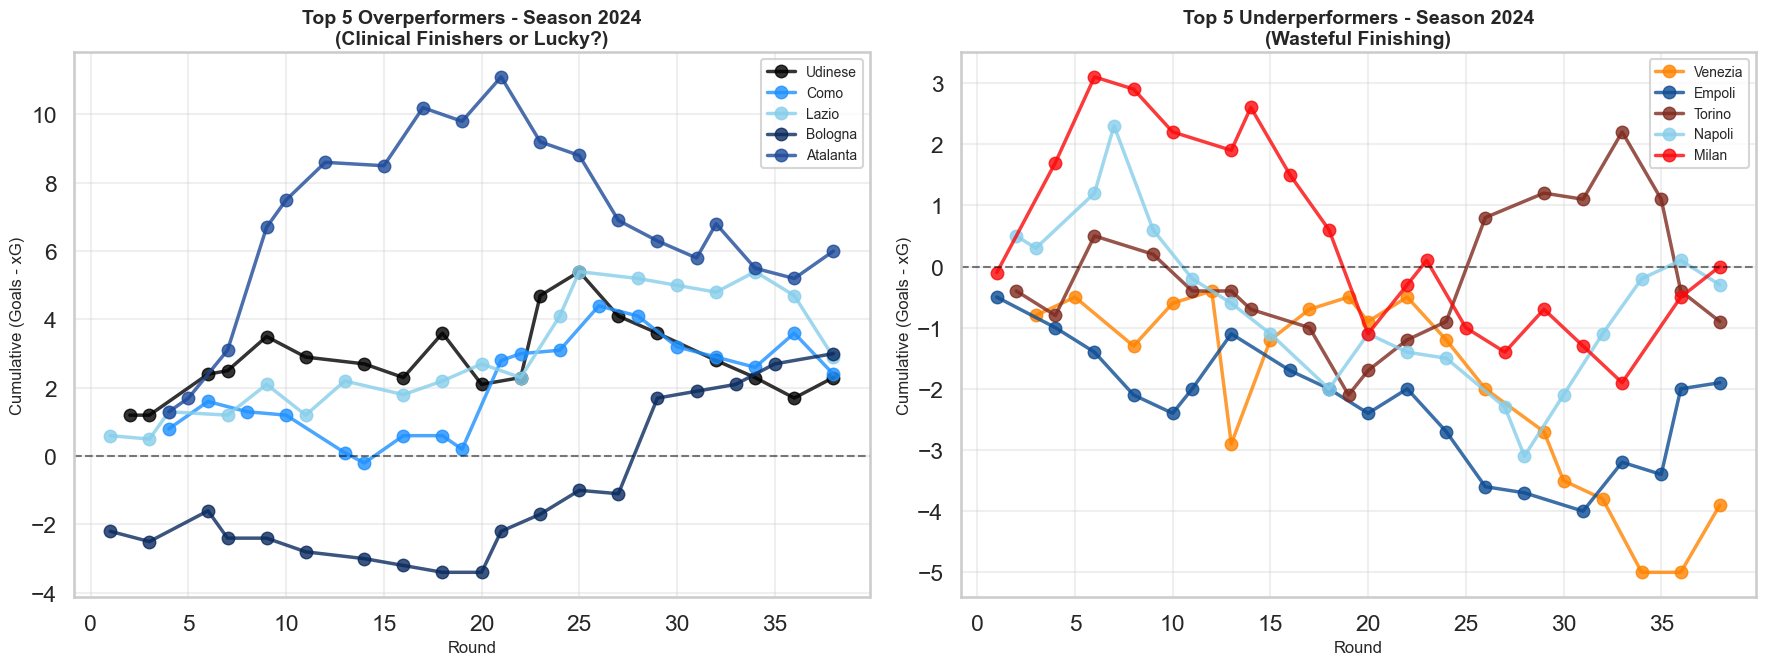


Season 2024 - Overperformance Analysis

Top 5 Clinical Finishers (Most overperformance):
    team  cumulative_overperf
 Udinese                  2.3
    Como                  2.4
   Lazio                  2.9
 Bologna                  3.0
Atalanta                  6.0

Top 5 Wasteful Teams (Most underperformance):
   team  cumulative_overperf
Venezia        -3.900000e+00
 Empoli        -1.900000e+00
 Torino        -9.000000e-01
 Napoli        -3.000000e-01
  Milan        -8.881784e-16



In [119]:
# Analysis #1: xG Overperformance Sustainability
# Track cumulative (Goals - xG) across rounds to see if teams sustain overperformance

# Calculate overperformance per match
df['overperf_match'] = df['gf'] - df['xg']

# For focused season, calculate cumulative overperformance by team
season_df = df[df['season'] == season_focus].sort_values(['team', 'round']).copy()

# Calculate cumulative overperformance
cumulative_overperf = []
for team in season_df['team'].unique():
    team_data = season_df[season_df['team'] == team].copy()
    team_data['cumulative_overperf'] = team_data['overperf_match'].cumsum()
    cumulative_overperf.append(team_data[['team', 'round', 'cumulative_overperf']])

cumulative_df = pd.concat(cumulative_overperf)

# Identify top 5 overperformers and bottom 5 underperformers at season end
final_overperf = cumulative_df[cumulative_df['round'] == 38].sort_values('cumulative_overperf')
top5_teams = final_overperf.tail(5)['team'].tolist()
bottom5_teams = final_overperf.head(5)['team'].tolist()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot top 5 overperformers
for team in top5_teams:
    team_data = cumulative_df[cumulative_df['team'] == team]
    team_color = team_colors.get(team, 'steelblue')
    ax1.plot(team_data['round'], team_data['cumulative_overperf'], 
             marker='o', linewidth=2.5, alpha=0.8, label=team, color=team_color)

ax1.axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
ax1.set_xlabel('Round', fontsize=12)
ax1.set_ylabel('Cumulative (Goals - xG)', fontsize=12)
ax1.set_title(f'Top 5 Overperformers - Season {season_focus}\n(Clinical Finishers or Lucky?)', 
              fontsize=14, weight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(alpha=0.3)

# Plot bottom 5 underperformers
for team in bottom5_teams:
    team_data = cumulative_df[cumulative_df['team'] == team]
    team_color = team_colors.get(team, 'crimson')
    ax2.plot(team_data['round'], team_data['cumulative_overperf'], 
             marker='o', linewidth=2.5, alpha=0.8, label=team, color=team_color)

ax2.axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
ax2.set_xlabel('Round', fontsize=12)
ax2.set_ylabel('Cumulative (Goals - xG)', fontsize=12)
ax2.set_title(f'Top 5 Underperformers - Season {season_focus}\n(Wasteful Finishing)', 
              fontsize=14, weight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print(f"\n{'='*70}")
print(f"Season {season_focus} - Overperformance Analysis")
print(f"{'='*70}\n")
print("Top 5 Clinical Finishers (Most overperformance):")
print(final_overperf.tail(5)[['team', 'cumulative_overperf']].to_string(index=False))
print("\nTop 5 Wasteful Teams (Most underperformance):")
print(final_overperf.head(5)[['team', 'cumulative_overperf']].to_string(index=False))
print(f"\n{'='*70}")

### Analysis #2: Home Advantage Evolution Heatmap

**Question**: How has home advantage changed across teams and seasons? Did COVID (empty stadiums) affect it?

This heatmap shows home xG advantage by team across seasons:
- Seasons 2020-2021 likely had reduced attendance due to COVID
- Identifies teams most affected by home support

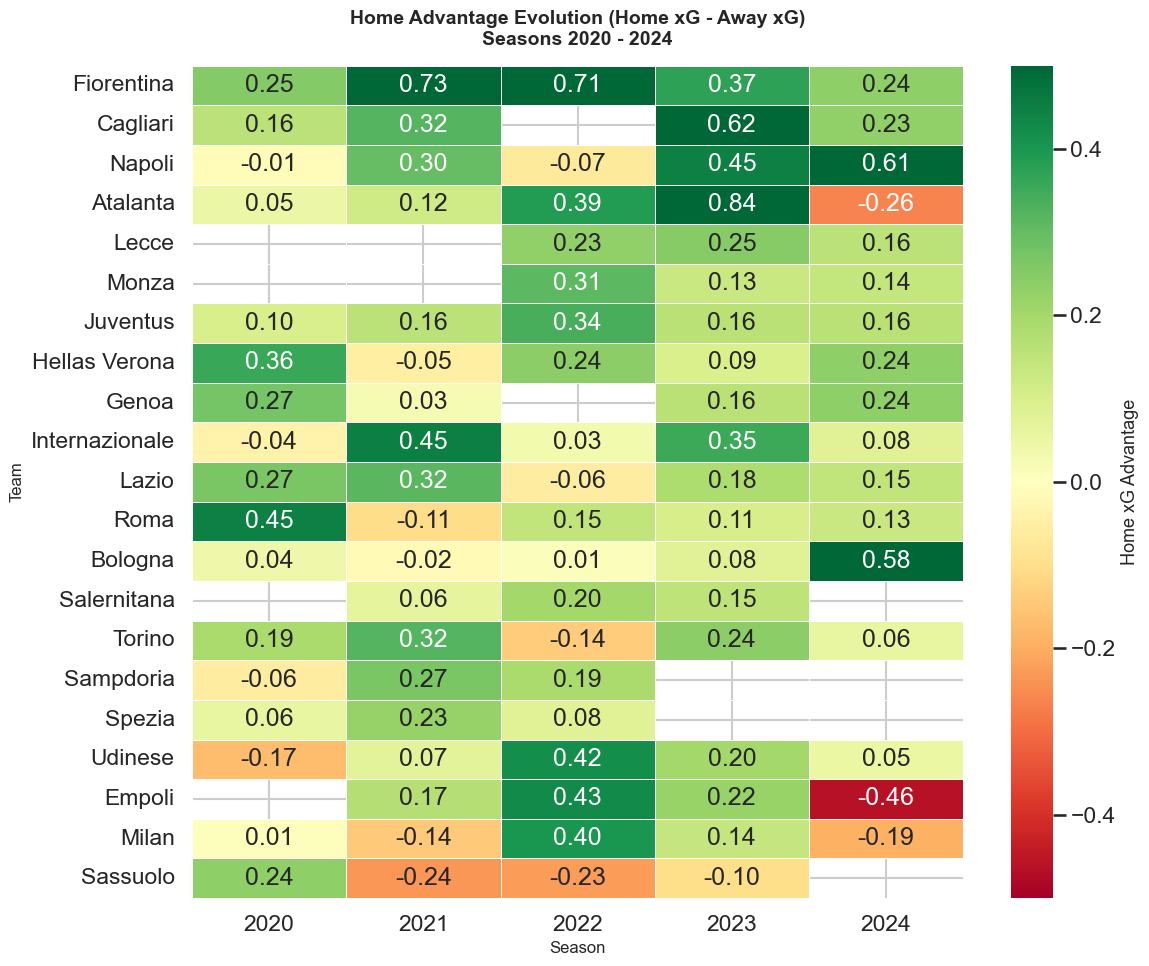


Home Advantage Analysis Across Seasons

Average home advantage by season (all teams):
  2020: +0.133 xG
  2021: +0.176 xG
  2022: +0.180 xG
  2023: +0.237 xG
  2024: +0.159 xG

Teams with strongest home advantage (average across all seasons):
  Fiorentina: +0.459 xG
  Venezia: +0.424 xG
  Parma: +0.350 xG
  Cagliari: +0.333 xG
  Como: +0.300 xG

Teams with weakest home advantage (perform better away):
  Sassuolo: -0.082 xG
  Cremonese: -0.026 xG
  Crotone: -0.016 xG
  Milan: +0.041 xG
  Frosinone: +0.084 xG



In [120]:
# Analysis #2: Home Advantage Evolution Heatmap
# Calculate home xG advantage (Home xG - Away xG) for each team across seasons

# Calculate home advantage per team per season
home_advantage_data = []

for season in seasons:
    season_data = df[df['season'] == season]
    
    for team in season_data['team'].unique():
        # Home matches
        home_matches = season_data[season_data['team'] == team]
        home_xg = home_matches['xg'].mean()
        
        # Away matches (when this team is the opponent)
        away_matches = season_data[season_data['opponent'] == team]
        away_xg = away_matches['xga'].mean()
        
        home_advantage = home_xg - away_xg
        
        home_advantage_data.append({
            'season': season,
            'team': team,
            'home_advantage': home_advantage,
            'home_xg': home_xg,
            'away_xg': away_xg
        })

home_adv_df = pd.DataFrame(home_advantage_data)

# Create pivot table for heatmap (teams that played in at least 3 seasons)
team_counts = home_adv_df['team'].value_counts()
consistent_teams = team_counts[team_counts >= 3].index.tolist()

heatmap_data = home_adv_df[home_adv_df['team'].isin(consistent_teams)].pivot(
    index='team', 
    columns='season', 
    values='home_advantage'
)

# Sort teams by average home advantage
heatmap_data['avg'] = heatmap_data.mean(axis=1)
heatmap_data = heatmap_data.sort_values('avg', ascending=False).drop('avg', axis=1)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, 
            cmap='RdYlGn', 
            center=0, 
            annot=True, 
            fmt='.2f', 
            cbar_kws={'label': 'Home xG Advantage'},
            linewidths=0.5,
            vmin=-0.5,
            vmax=0.5)

plt.title(f'Home Advantage Evolution (Home xG - Away xG)\nSeasons {min(seasons)} - {max(seasons)}', 
          fontsize=14, weight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

# Statistical insights
print(f"\n{'='*70}")
print(f"Home Advantage Analysis Across Seasons")
print(f"{'='*70}\n")
print("Average home advantage by season (all teams):")
season_avg = home_adv_df.groupby('season')['home_advantage'].mean()
for season, avg in season_avg.items():
    print(f"  {season}: {avg:+.3f} xG")

print("\nTeams with strongest home advantage (average across all seasons):")
top_home = home_adv_df.groupby('team')['home_advantage'].mean().sort_values(ascending=False).head(5)
for team, adv in top_home.items():
    print(f"  {team}: {adv:+.3f} xG")
    
print("\nTeams with weakest home advantage (perform better away):")
bottom_home = home_adv_df.groupby('team')['home_advantage'].mean().sort_values().head(5)
for team, adv in bottom_home.items():
    print(f"  {team}: {adv:+.3f} xG")
print(f"\n{'='*70}")

### Analysis #3: Round-by-Round Performance Heatmap

**Question**: When do teams peak or slump during the season?

This heatmap visualizes xG performance across all 38 rounds:
- Identifies "Christmas period" effects (rounds 15-20)
- Shows end-of-season collapses or surges
- Reveals tactical/fitness patterns throughout the season

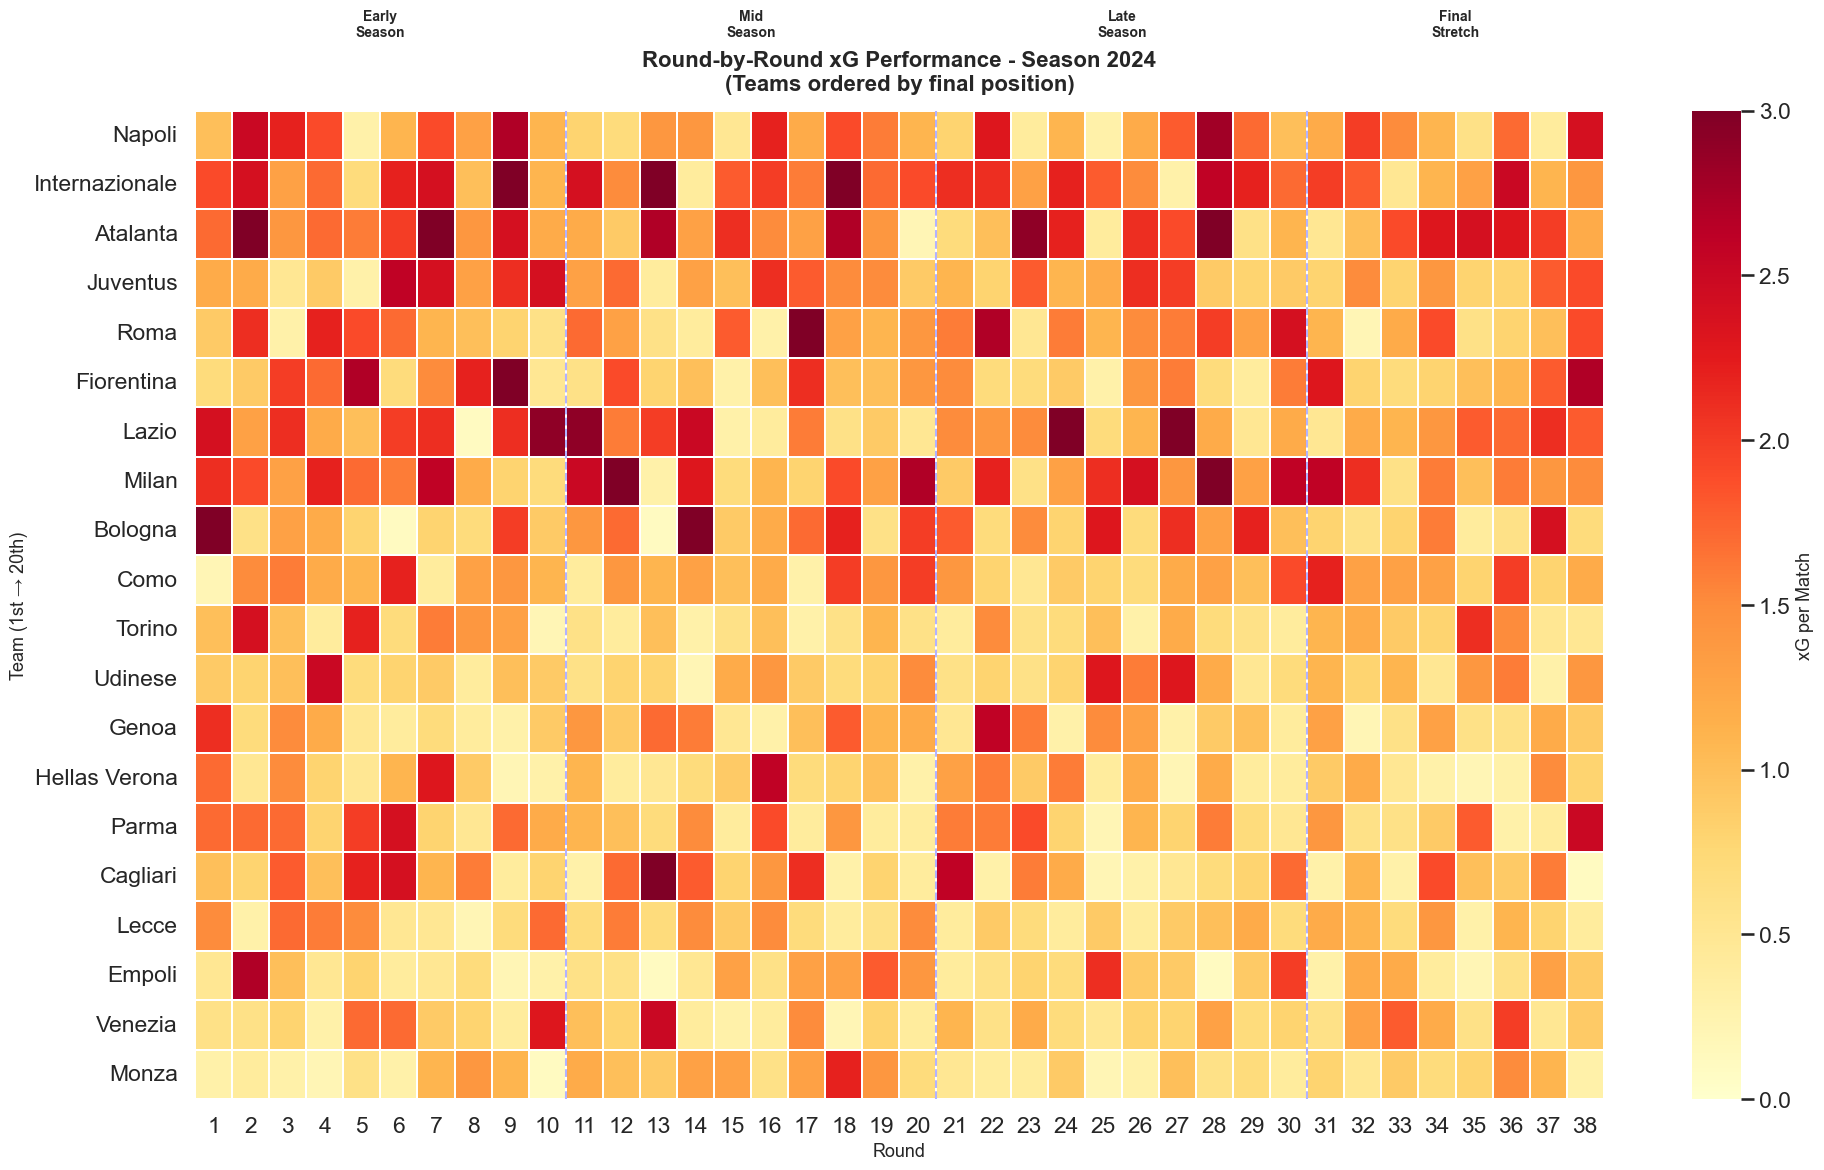


Season 2024 - Performance by Period

Average xG by period:
  Early Season (Rounds 1-10):   1.283
  Mid Season (Rounds 11-20):    1.212
  Late Season (Rounds 21-30):   1.173
  Final Stretch (Rounds 31-38): 1.139

Strongest finishers (best average xG in rounds 31-38):
  Atalanta: 1.700 xG
  Milan: 1.550 xG
  Internazionale: 1.462 xG
  Lazio: 1.450 xG
  Fiorentina: 1.400 xG



In [121]:
# Analysis #3: Round-by-Round Performance Heatmap
# Visualize xG performance across all 38 rounds for the focused season

# Use existing season_tables data which has round-by-round information
# Create a matrix of xG per match by team and round

season_data = df[df['season'] == season_focus].copy()

# Aggregate xG per team per round (home + away)
round_performance = []

for team in season_data['team'].unique():
    team_rounds = {}
    
    # Home matches
    home_matches = season_data[season_data['team'] == team]
    for _, match in home_matches.iterrows():
        team_rounds[match['round']] = team_rounds.get(match['round'], 0) + match['xg']
    
    # Away matches
    away_matches = season_data[season_data['opponent'] == team]
    for _, match in away_matches.iterrows():
        team_rounds[match['round']] = team_rounds.get(match['round'], 0) + match['xga']
    
    # Create row for this team
    for round_num in range(1, 39):
        round_performance.append({
            'team': team,
            'round': round_num,
            'xg': team_rounds.get(round_num, np.nan)
        })

performance_df = pd.DataFrame(round_performance)

# Create pivot table
heatmap_pivot = performance_df.pivot(index='team', columns='round', values='xg')

# Get final standings from season_tables to sort teams
final_standings = season_tables[season_focus][38].sort_values('pos')
team_order = final_standings['team'].tolist()

# Reorder heatmap by final position
heatmap_pivot = heatmap_pivot.reindex(team_order)

# Create heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_pivot, 
            cmap='YlOrRd', 
            annot=False, 
            cbar_kws={'label': 'xG per Match'},
            linewidths=0.1,
            vmin=0,
            vmax=3)

plt.title(f'Round-by-Round xG Performance - Season {season_focus}\n(Teams ordered by final position)', 
          fontsize=16, weight='bold', pad=15)
plt.xlabel('Round', fontsize=13)
plt.ylabel('Team (1st → 20th)', fontsize=13)

# Add vertical lines to highlight key periods
plt.axvline(x=10, color='blue', linestyle='--', alpha=0.3, linewidth=1.5)
plt.axvline(x=20, color='blue', linestyle='--', alpha=0.3, linewidth=1.5)
plt.axvline(x=30, color='blue', linestyle='--', alpha=0.3, linewidth=1.5)

# Add text annotations for periods
plt.text(5, -1.5, 'Early\nSeason', ha='center', fontsize=10, weight='bold')
plt.text(15, -1.5, 'Mid\nSeason', ha='center', fontsize=10, weight='bold')
plt.text(25, -1.5, 'Late\nSeason', ha='center', fontsize=10, weight='bold')
plt.text(34, -1.5, 'Final\nStretch', ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# Calculate average xG by period
print(f"\n{'='*70}")
print(f"Season {season_focus} - Performance by Period")
print(f"{'='*70}\n")

early = performance_df[performance_df['round'] <= 10]['xg'].mean()
mid = performance_df[(performance_df['round'] > 10) & (performance_df['round'] <= 20)]['xg'].mean()
late = performance_df[(performance_df['round'] > 20) & (performance_df['round'] <= 30)]['xg'].mean()
final = performance_df[performance_df['round'] > 30]['xg'].mean()

print(f"Average xG by period:")
print(f"  Early Season (Rounds 1-10):   {early:.3f}")
print(f"  Mid Season (Rounds 11-20):    {mid:.3f}")
print(f"  Late Season (Rounds 21-30):   {late:.3f}")
print(f"  Final Stretch (Rounds 31-38): {final:.3f}")

# Identify strongest finishers
final_rounds = performance_df[performance_df['round'] > 30]
strong_finishers = final_rounds.groupby('team')['xg'].mean().sort_values(ascending=False).head(5)

print(f"\nStrongest finishers (best average xG in rounds 31-38):")
for team, xg in strong_finishers.items():
    print(f"  {team}: {xg:.3f} xG")

print(f"\n{'='*70}")

### ⚽ Formation Analysis: Tactical Impact on xG

**Question**: Which formation combinations create the most chances (xG) and which prevent them best (xGA)?

This analysis examines:
- Best attacking formations (highest average xG)
- Best defensive formations (lowest average xGA)
- Formation matchup dynamics

In [122]:
# First, check if formation data exists in the dataframe
print("Available columns in dataframe:")
print(df.columns.tolist())
print(f"\nDataframe shape: {df.shape}")

# Check for formation-related columns
formation_cols = [col for col in df.columns if 'formation' in col.lower()]
print(f"\nFormation-related columns: {formation_cols}")

# Display sample data
if formation_cols:
    print("\nSample data with formations:")
    print(df[['team', 'opponent', 'xg', 'xga'] + formation_cols].head(10))
else:
    print("\n⚠️ No formation columns found in the dataset.")
    print("Checking all available columns for tactical data...")

Available columns in dataframe:
['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation', 'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team', 'opp captain', 'opp sh', 'opp sot', 'opp dist', 'opp fk', 'opp pk', 'opp pkatt', 'overperf_match']

Dataframe shape: (1900, 36)

Formation-related columns: ['formation', 'opp formation']

Sample data with formations:
        team        opponent   xg  xga formation opp formation
50  Atalanta           Parma  1.2  2.5     3-4-3       3-1-4-2
51     Lazio           Lecce  1.8  0.4   4-2-3-1       4-2-3-1
52    Torino            Roma  0.5  1.9   4-2-3-1       4-1-4-1
53   Udinese      Fiorentina  1.4  2.7     3-5-2         3-5-2
54    Empoli   Hellas Verona  0.9  0.8     3-4-3       3-5-1-1
55   Venezia        Juventus  0.9  1.9     3-5-2         3-4-3
56     Milan           Monza  1.5  0.3   4-2-3-1      

Formation Statistics (min 20 matches):
           avg_xg  matches  avg_xga
formation                          
4-2-3-1     1.474      418    1.190
3-4-1-2     1.453      106    1.184
3-5-2       1.428      395    1.209
4-3-3       1.426      303    1.179
4-4-2       1.346       83    1.228
3-4-3       1.318      346    1.121
4-1-4-1     1.250       26    1.112
3-1-4-2     1.223       22    1.168
3-5-1-1     1.193       45    1.233
4-3-2-1     1.189       45    1.362
4-3-1-2     1.163       54    1.598


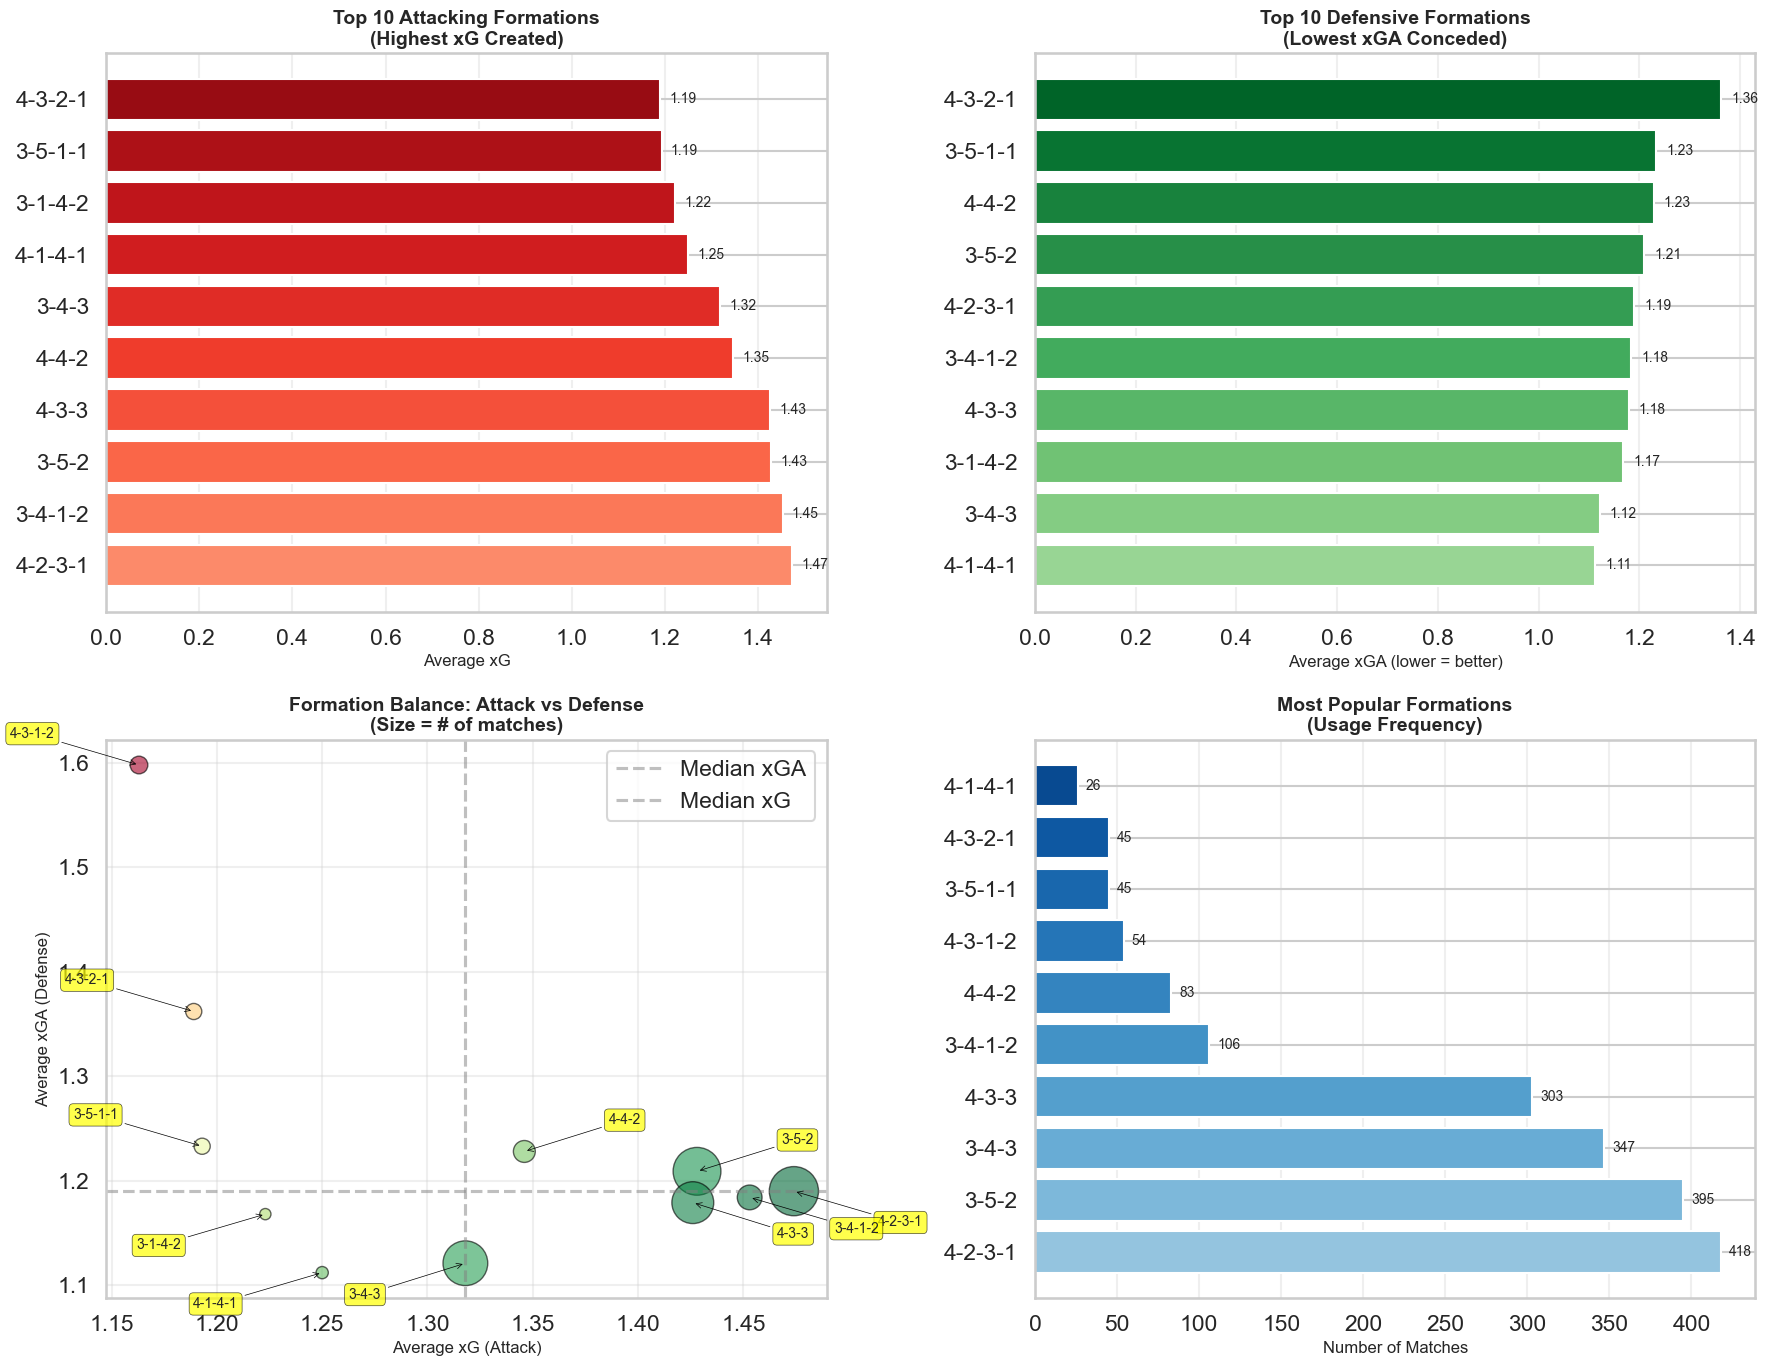


Formation Analysis - Key Insights

Best Attacking Formation: 4-2-3-1 (1.474 xG)
Best Defensive Formation: 4-1-4-1 (1.112 xGA)
Most Popular Formation: 4-2-3-1 (418 matches)



In [136]:
# Formation Analysis: xG by Formation
# Analyze which formations create and prevent the most chances

# Calculate average xG and xGA by formation
formation_stats = df.groupby('formation').agg({
    'xg': ['mean', 'count'],
    'xga': 'mean'
}).round(3)

formation_stats.columns = ['avg_xg', 'matches', 'avg_xga']
formation_stats = formation_stats[formation_stats['matches'] >= 20].sort_values('avg_xg', ascending=False)

print("Formation Statistics (min 20 matches):")
print(formation_stats)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Bar chart: Top formations by attacking xG
top_attacking = formation_stats.nlargest(10, 'avg_xg')
axes[0, 0].barh(range(len(top_attacking)), top_attacking['avg_xg'], 
                color=plt.cm.Reds(np.linspace(0.4, 0.9, len(top_attacking))))
axes[0, 0].set_yticks(range(len(top_attacking)))
axes[0, 0].set_yticklabels(top_attacking.index)
axes[0, 0].set_xlabel('Average xG', fontsize=12)
axes[0, 0].set_title('Top 10 Attacking Formations\n(Highest xG Created)', fontsize=14, weight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
# Add value labels
for i, v in enumerate(top_attacking['avg_xg']):
    axes[0, 0].text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=10)

# 2. Bar chart: Best defensive formations (lowest xGA)
top_defensive = formation_stats.nsmallest(10, 'avg_xga')
axes[0, 1].barh(range(len(top_defensive)), top_defensive['avg_xga'], 
                color=plt.cm.Greens(np.linspace(0.4, 0.9, len(top_defensive))))
axes[0, 1].set_yticks(range(len(top_defensive)))
axes[0, 1].set_yticklabels(top_defensive.index)
axes[0, 1].set_xlabel('Average xGA (lower = better)', fontsize=12)
axes[0, 1].set_title('Top 10 Defensive Formations\n(Lowest xGA Conceded)', fontsize=14, weight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
# Add value labels
for i, v in enumerate(top_defensive['avg_xga']):
    axes[0, 1].text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=10)

# 3. Scatter plot: xG vs xGA by formation
axes[1, 0].scatter(formation_stats['avg_xg'], formation_stats['avg_xga'], 
                   s=formation_stats['matches']*3, alpha=0.6, 
                   c=formation_stats['avg_xg'] - formation_stats['avg_xga'],
                   cmap='RdYlGn', edgecolors='black', linewidth=1)

# Annotate ALL formations with smart positioning
for idx in formation_stats.index:
    row = formation_stats.loc[idx]
    # Offset labels based on position relative to median
    x_offset = 0.04 if row['avg_xg'] > formation_stats['avg_xg'].median() else -0.04
    y_offset = 0.03 if row['avg_xga'] > formation_stats['avg_xga'].median() else -0.03
    ha = 'left' if x_offset > 0 else 'right'
    
    axes[1, 0].annotate(idx, 
                       xy=(row['avg_xg'], row['avg_xga']),
                       xytext=(row['avg_xg'] + x_offset, row['avg_xga'] + y_offset),
                       fontsize=10, ha=ha, va='center',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7, edgecolor='black', linewidth=0.5),
                       arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=0.5, color='black'))

axes[1, 0].axhline(formation_stats['avg_xga'].median(), color='gray', linestyle='--', alpha=0.5, label='Median xGA')
axes[1, 0].axvline(formation_stats['avg_xg'].median(), color='gray', linestyle='--', alpha=0.5, label='Median xG')
axes[1, 0].set_xlabel('Average xG (Attack)', fontsize=12)
axes[1, 0].set_ylabel('Average xGA (Defense)', fontsize=12)
axes[1, 0].set_title('Formation Balance: Attack vs Defense\n(Size = # of matches)', fontsize=14, weight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Formation usage frequency
formation_counts = df['formation'].value_counts().head(10)
axes[1, 1].barh(range(len(formation_counts)), formation_counts.values,
                color=plt.cm.Blues(np.linspace(0.4, 0.9, len(formation_counts))))
axes[1, 1].set_yticks(range(len(formation_counts)))
axes[1, 1].set_yticklabels(formation_counts.index)
axes[1, 1].set_xlabel('Number of Matches', fontsize=12)
axes[1, 1].set_title('Most Popular Formations\n(Usage Frequency)', fontsize=14, weight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
# Add value labels
for i, v in enumerate(formation_counts.values):
    axes[1, 1].text(v + 5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print key insights
print(f"\n{'='*70}")
print("Formation Analysis - Key Insights")
print(f"{'='*70}\n")
print(f"Best Attacking Formation: {formation_stats.index[0]} ({formation_stats.iloc[0]['avg_xg']:.3f} xG)")
print(f"Best Defensive Formation: {top_defensive.index[0]} ({top_defensive.iloc[0]['avg_xga']:.3f} xGA)")
print(f"Most Popular Formation: {formation_counts.index[0]} ({formation_counts.iloc[0]} matches)")
print(f"\n{'='*70}")

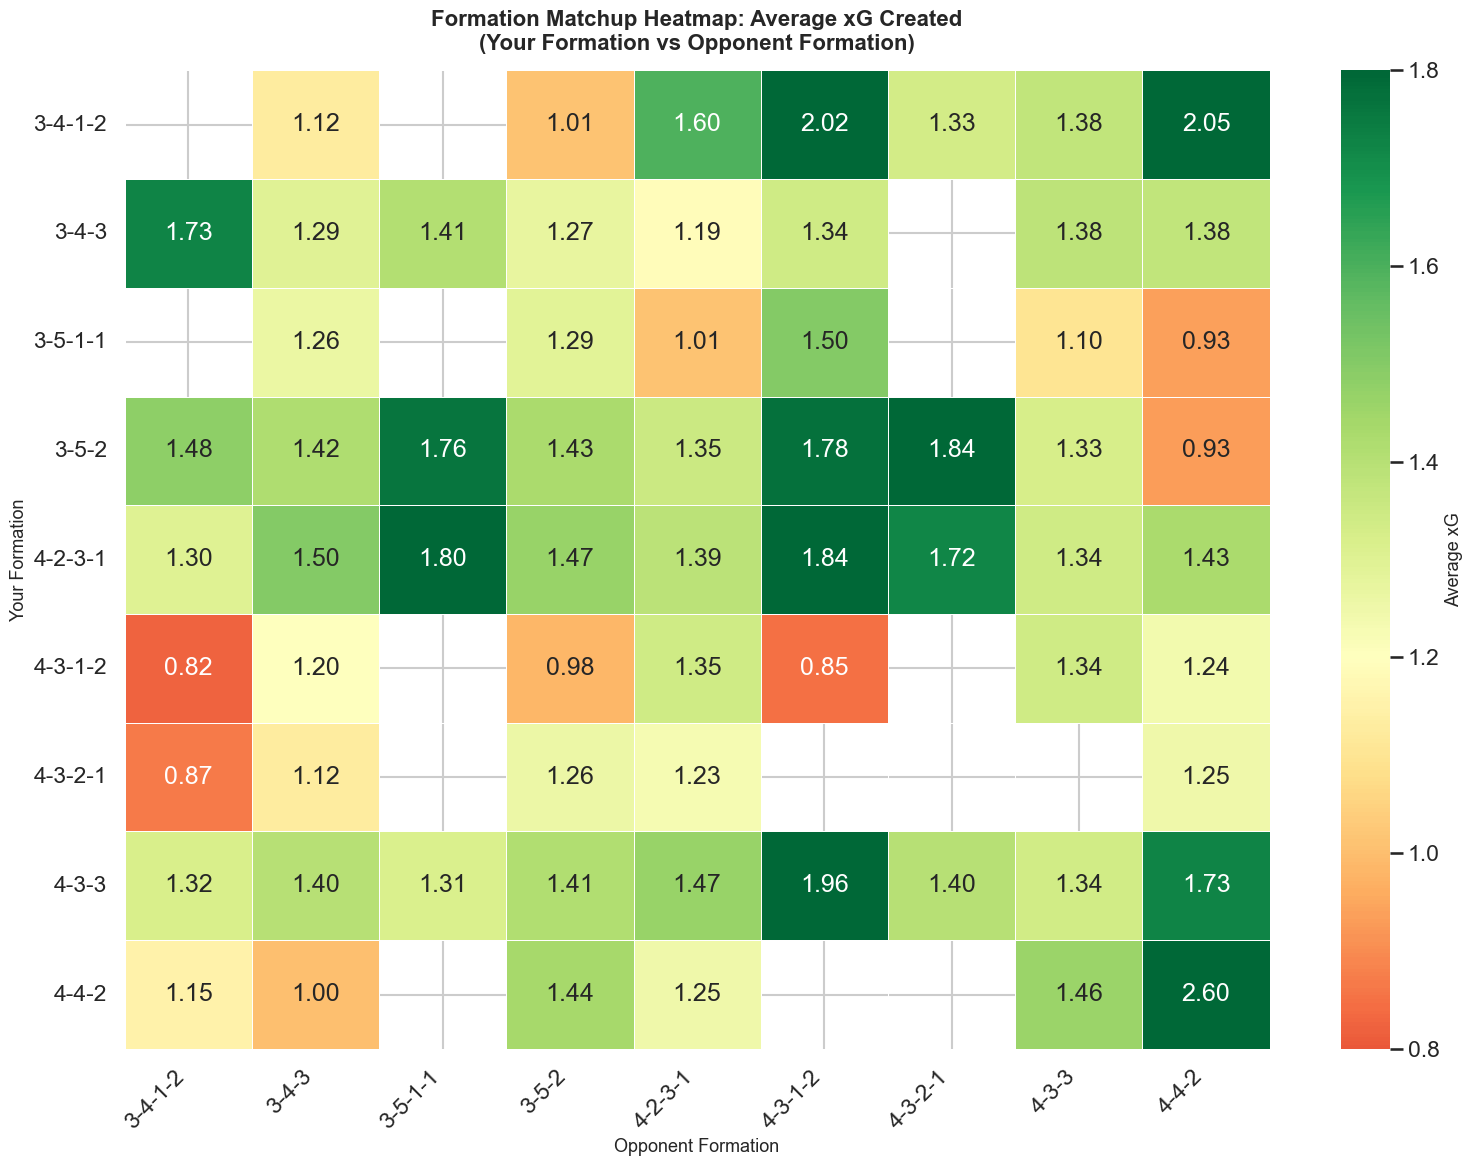


Formation Matchup Analysis

Top 5 Best Attacking Matchups (Highest xG):
       4-4-2 vs      4-4-2 → 2.600 xG (4 matches)
     3-4-1-2 vs      4-4-2 → 2.050 xG (4 matches)
     3-4-1-2 vs    4-3-1-2 → 2.025 xG (4 matches)
       4-3-3 vs    4-3-1-2 → 1.956 xG (9 matches)
     4-2-3-1 vs    4-3-1-2 → 1.844 xG (9 matches)

Top 5 Worst Attacking Matchups (Lowest xG):
     4-3-1-2 vs    3-4-1-2 → 0.825 xG (4 matches)
     4-3-1-2 vs    4-3-1-2 → 0.850 xG (4 matches)
     4-3-2-1 vs    3-4-1-2 → 0.867 xG (3 matches)
       3-5-2 vs      4-4-2 → 0.930 xG (10 matches)
     3-5-1-1 vs      4-4-2 → 0.933 xG (3 matches)



In [124]:
# Formation Matchup Analysis: Heatmap
# Which formation combinations result in highest/lowest xG?

# Create formation matchup matrix
matchup_data = df.groupby(['formation', 'opp formation']).agg({
    'xg': 'mean',
    'team': 'count'  # number of matches
}).reset_index()

matchup_data.columns = ['formation', 'opp_formation', 'avg_xg', 'matches']

# Filter for formations with significant data (min 10 matches)
significant_formations = matchup_data.groupby('formation')['matches'].sum()
significant_formations = significant_formations[significant_formations >= 30].index.tolist()

matchup_filtered = matchup_data[
    (matchup_data['formation'].isin(significant_formations)) & 
    (matchup_data['opp_formation'].isin(significant_formations)) &
    (matchup_data['matches'] >= 3)
]

# Create pivot table for heatmap
matchup_pivot = matchup_filtered.pivot(
    index='formation',
    columns='opp_formation',
    values='avg_xg'
)

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(matchup_pivot, 
            cmap='RdYlGn', 
            annot=True, 
            fmt='.2f', 
            cbar_kws={'label': 'Average xG'},
            linewidths=0.5,
            vmin=0.8,
            vmax=1.8,
            center=1.2)

plt.title('Formation Matchup Heatmap: Average xG Created\n(Your Formation vs Opponent Formation)', 
          fontsize=16, weight='bold', pad=15)
plt.xlabel('Opponent Formation', fontsize=13)
plt.ylabel('Your Formation', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find best and worst matchups
print(f"\n{'='*70}")
print("Formation Matchup Analysis")
print(f"{'='*70}\n")

# Best attacking matchups
best_matchups = matchup_filtered.nlargest(5, 'avg_xg')
print("Top 5 Best Attacking Matchups (Highest xG):")
for _, row in best_matchups.iterrows():
    print(f"  {row['formation']:>10} vs {row['opp_formation']:>10} → {row['avg_xg']:.3f} xG ({int(row['matches'])} matches)")

# Worst attacking matchups
worst_matchups = matchup_filtered.nsmallest(5, 'avg_xg')
print("\nTop 5 Worst Attacking Matchups (Lowest xG):")
for _, row in worst_matchups.iterrows():
    print(f"  {row['formation']:>10} vs {row['opp_formation']:>10} → {row['avg_xg']:.3f} xG ({int(row['matches'])} matches)")

print(f"\n{'='*70}")

## Data Exploration

Additional exploratory analyses to understand the dataset characteristics:
1. Teams participation across seasons
2. Match results distribution
3. Total goals scored by teams
4. Average positions for consistent teams (5 seasons)

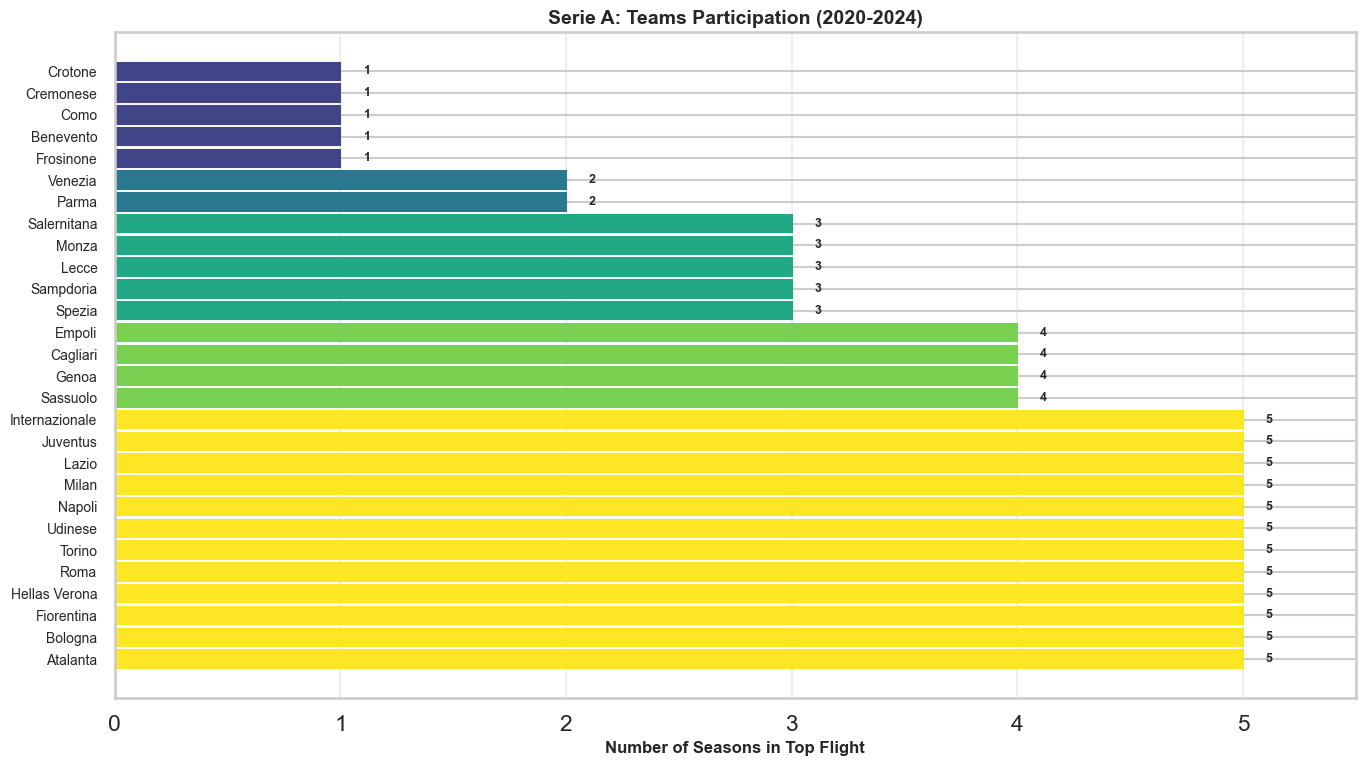


Total teams in dataset: 28
Teams with 5 seasons: 12
Teams with 1 season: 5


In [125]:
# 1. Teams and how many seasons they've played in the top flight
# Count unique seasons per team
team_seasons_count = df.groupby('team')['season'].nunique().sort_values(ascending=False)

# Create visualization
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(range(len(team_seasons_count)), team_seasons_count.values)

# Color bars based on number of seasons
colors = plt.cm.viridis(team_seasons_count.values / team_seasons_count.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_yticks(range(len(team_seasons_count)))
ax.set_yticklabels(team_seasons_count.index, fontsize=10)
ax.set_xlabel('Number of Seasons in Top Flight', fontsize=12, fontweight='bold')
ax.set_title('Serie A: Teams Participation (2020-2024)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.set_xlim(0, 5.5)

# Add value labels
for i, (team, count) in enumerate(team_seasons_count.items()):
    ax.text(count + 0.1, i, str(count), va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal teams in dataset: {len(team_seasons_count)}")
print(f"Teams with 5 seasons: {(team_seasons_count == 5).sum()}")
print(f"Teams with 1 season: {(team_seasons_count == 1).sum()}")

result
Home Win    775
Draw        514
Away Win    611
Name: count, dtype: int64


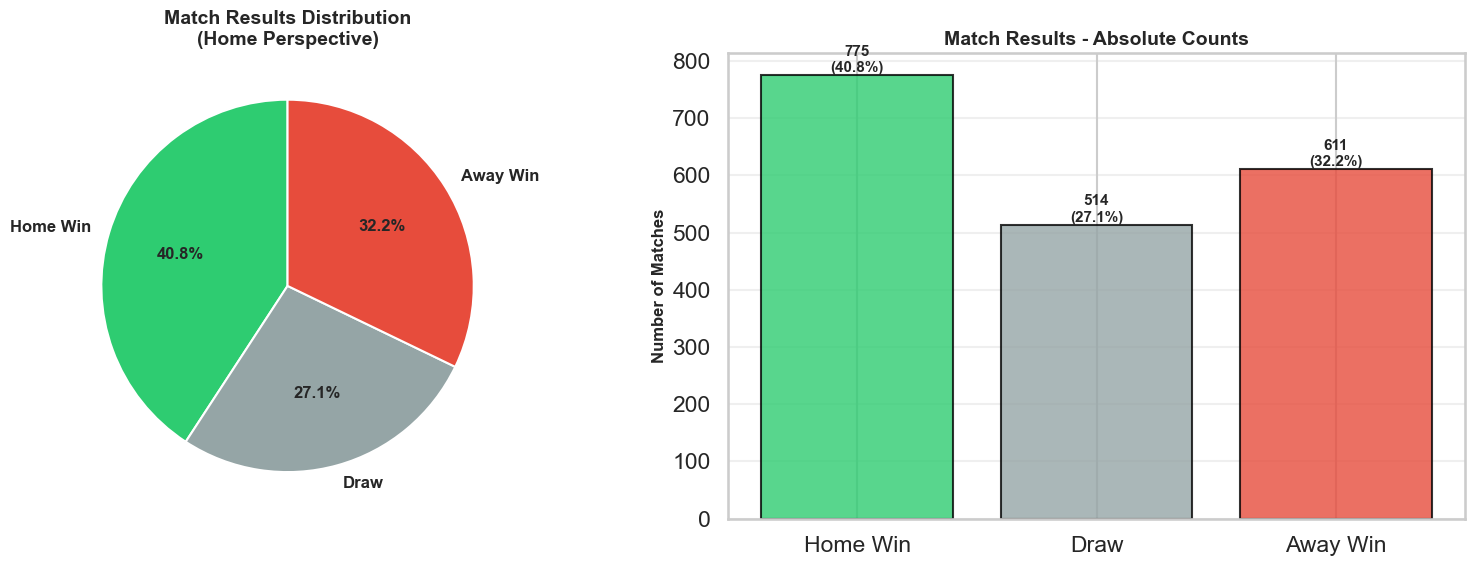


Total matches analyzed: 1900

Results breakdown:
  Home Win: 775 matches (40.8%)
  Draw: 514 matches (27.1%)
  Away Win: 611 matches (32.2%)


In [129]:
# 2. Game results distribution (home won, draws, away won)
# Determine match outcome from home team perspective
def classify_result(row):
    if row['gf'] > row['ga']:
        return 'Home Win'
    elif row['gf'] < row['ga']:
        return 'Away Win'
    else:
        return 'Draw'

df['result'] = df.apply(classify_result, axis=1)
result_counts = df['result'].value_counts().sort_index(ascending=False)  # Home Win, Draw, Away Win
print(result_counts)

# Calculate percentages
result_percentages = (result_counts / len(df) * 100).round(1)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors_results = ['#2ecc71', '#95a5a6', '#e74c3c']
wedges, texts, autotexts = ax1.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%',
                                      startangle=90, colors=colors_results, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Match Results Distribution\n(Home Perspective)', fontsize=14, fontweight='bold')

# Bar chart with counts
bars = ax2.bar(result_counts.index, result_counts.values, color=colors_results, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Number of Matches', fontsize=12, fontweight='bold')
ax2.set_title('Match Results - Absolute Counts', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count, pct in zip(bars, result_counts.values, result_percentages.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({pct}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal matches analyzed: {len(df)}")
print(f"\nResults breakdown:")
for result, count in result_counts.items():
    print(f"  {result}: {count} matches ({result_percentages[result]}%)")

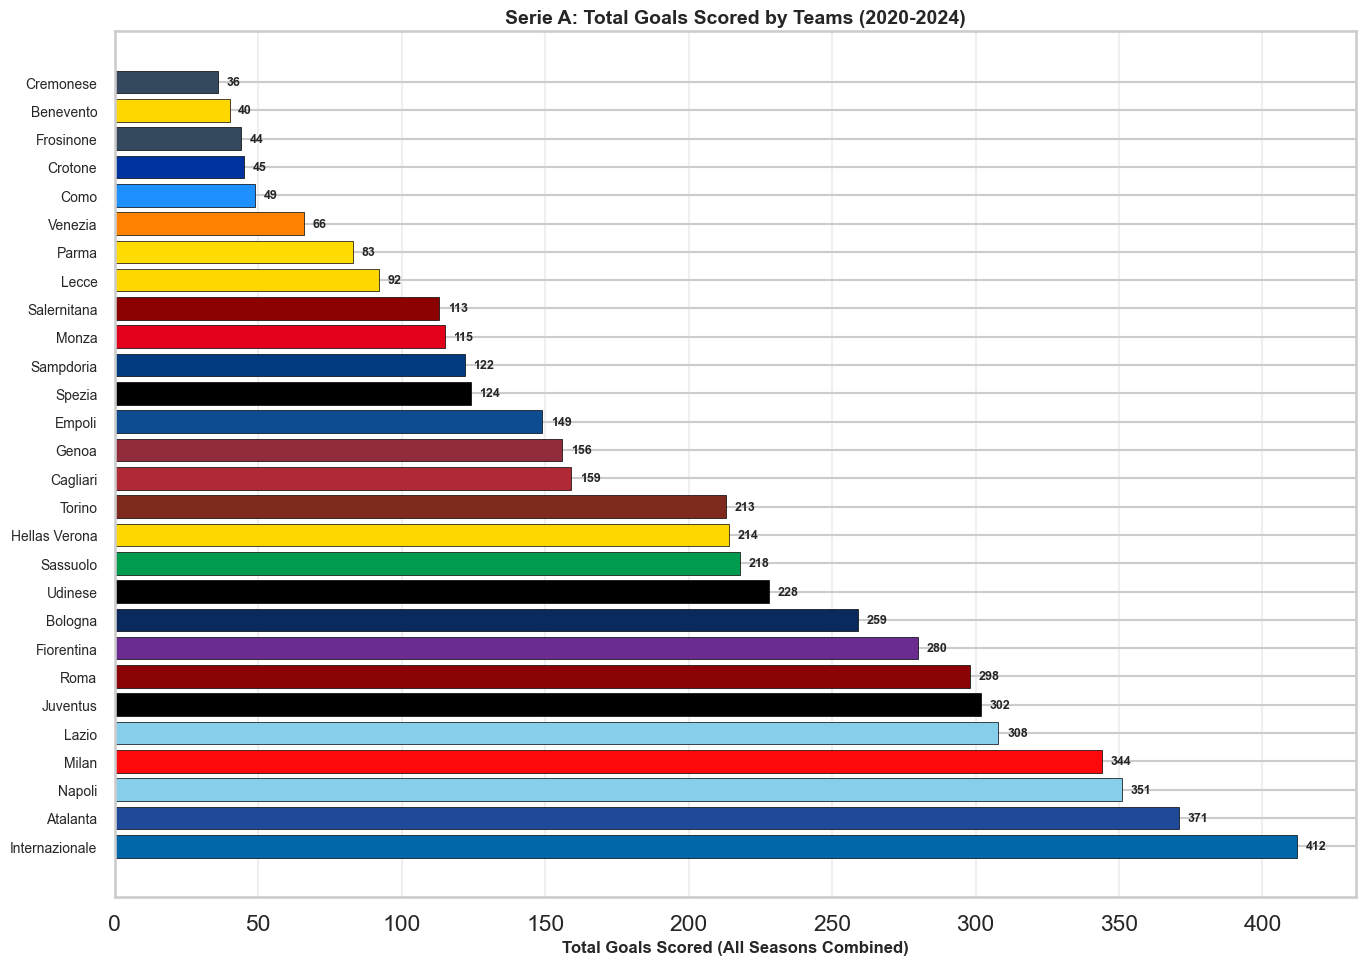


Top 5 goal scorers (all seasons):
  Internazionale: 412 goals
  Atalanta: 371 goals
  Napoli: 351 goals
  Milan: 344 goals
  Lazio: 308 goals

Bottom 5 goal scorers:
  Como: 49 goals
  Crotone: 45 goals
  Frosinone: 44 goals
  Benevento: 40 goals
  Cremonese: 36 goals


In [130]:
# 3. All goals scored by teams in all seasons combined
# Aggregate goals from both home and away matches
home_goals = df.groupby('team')['gf'].sum()
away_goals = df.groupby('opponent')['ga'].sum()  # Goals scored away (opponent's ga when they were home)

# Alternative: Calculate from away matches
away_matches_goals = df.groupby('opponent')['gf'].sum()  # This is wrong - we need away perspective

# Correct approach: Sum home goals + away goals for each team
home_total = df.groupby('team')['gf'].sum()
# For away goals: when team is opponent, they scored 'ga' goals from home team's perspective
away_total = df.groupby('opponent')['ga'].sum()

total_goals = home_total.add(away_total, fill_value=0).sort_values(ascending=False)

# Create visualization with team colors
fig, ax = plt.subplots(figsize=(14, 10))
bars = ax.barh(range(len(total_goals)), total_goals.values)

# Color bars by team
for i, (team, goals) in enumerate(total_goals.items()):
    color = team_colors.get(team, '#34495e')
    bars[i].set_color(color)
    bars[i].set_edgecolor('black')
    bars[i].set_linewidth(0.5)

ax.set_yticks(range(len(total_goals)))
ax.set_yticklabels(total_goals.index, fontsize=10)
ax.set_xlabel('Total Goals Scored (All Seasons Combined)', fontsize=12, fontweight='bold')
ax.set_title('Serie A: Total Goals Scored by Teams (2020-2024)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (team, goals) in enumerate(total_goals.items()):
    ax.text(goals + 3, i, f'{int(goals)}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTop 5 goal scorers (all seasons):")
for team, goals in total_goals.head().items():
    print(f"  {team}: {int(goals)} goals")
print(f"\nBottom 5 goal scorers:")
for team, goals in total_goals.tail().items():
    print(f"  {team}: {int(goals)} goals")

Teams that participated in all 5 seasons: 12

Calculating positions from match data instead...



Positions collected for 12 teams



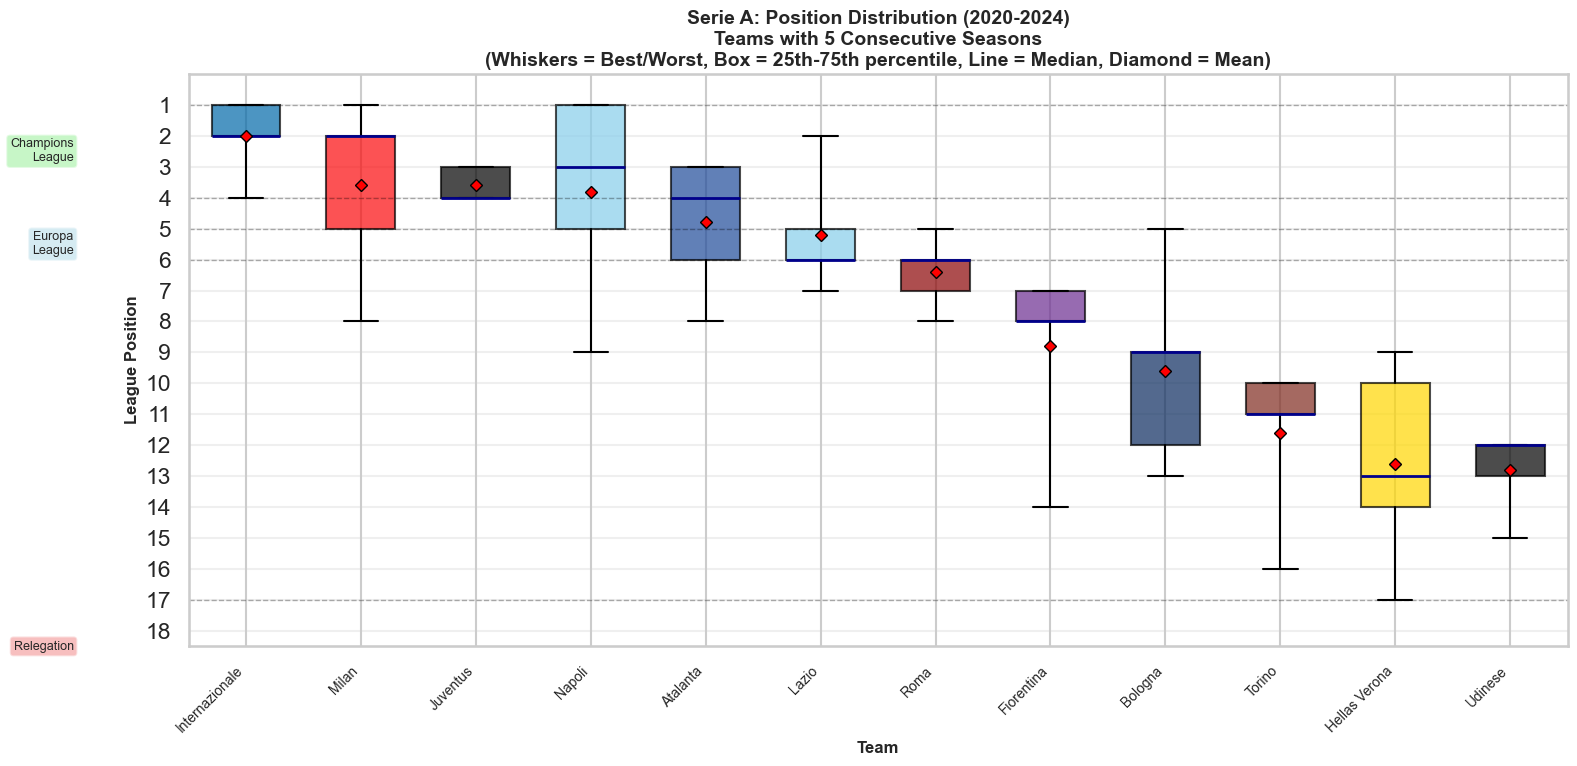

Most consistent top performers (best median position):
  Internazionale: Median=2.0, Best=1, Worst=4
  Milan: Median=2.0, Best=1, Worst=8
  Juventus: Median=4.0, Best=3, Worst=4
  Napoli: Median=3.0, Best=1, Worst=9
  Atalanta: Median=4.0, Best=3, Worst=8

Most consistent bottom performers (worst median position):
  Fiorentina: Median=8.0, Best=7, Worst=14
  Bologna: Median=9.0, Best=5, Worst=13
  Torino: Median=11.0, Best=10, Worst=16
  Hellas Verona: Median=13.0, Best=9, Worst=17
  Udinese: Median=12.0, Best=12, Worst=15


In [131]:
# 4. Teams average positions in last 5 years (only teams that participated in all seasons)
# First, identify teams that participated in all 5 seasons
teams_all_seasons = team_seasons_count[team_seasons_count == 5].index.tolist()

print(f"Teams that participated in all 5 seasons: {len(teams_all_seasons)}")

# Extract final positions for these teams from season_tables
average_positions = {}

for team in teams_all_seasons:
    positions = []
    for season in seasons:
        # Get final table for this season (round 38)
        if season in season_tables and 38 in season_tables[season]:
            final_table = season_tables[season][38]
            # Find team's position
            if team in final_table.index:
                position = final_table.index.get_loc(team) + 1  # +1 because index is 0-based
                positions.append(position)
    
    if len(positions) == 5:
        average_positions[team] = np.mean(positions)

# If no teams found, calculate from original data
if len(average_positions) == 0:
    print("\nCalculating positions from match data instead...")
    # For each team and season, calculate points and then position
    for team in teams_all_seasons:
        positions = []
        for season in seasons:
            # Filter for this season
            season_df = df[df['season'] == season]
            
            # Calculate points for all teams
            teams_points = {}
            all_teams = pd.concat([season_df['team'], season_df['opponent']]).unique()
            
            for t in all_teams:
                home_matches = season_df[season_df['team'] == t]
                away_matches = season_df[season_df['opponent'] == t]
                
                # Home points
                home_wins = (home_matches['gf'] > home_matches['ga']).sum() * 3
                home_draws = (home_matches['gf'] == home_matches['ga']).sum() * 1
                
                # Away points (reversed perspective)
                away_wins = (away_matches['gf'] < away_matches['ga']).sum() * 3
                away_draws = (away_matches['gf'] == away_matches['ga']).sum() * 1
                
                teams_points[t] = home_wins + home_draws + away_wins + away_draws
            
            # Sort teams by points
            sorted_teams = sorted(teams_points.items(), key=lambda x: x[1], reverse=True)
            position = [i for i, (t, _) in enumerate(sorted_teams, 1) if t == team][0]
            positions.append(position)
        
        if len(positions) == 5:
            average_positions[team] = np.mean(positions)

# Collect all positions for boxplot (instead of just average)
teams_positions = {}
for team in teams_all_seasons:
    positions = []
    for season in seasons:
        # Get final table for this season (round 38)
        if season in season_tables and 38 in season_tables[season]:
            final_table = season_tables[season][38]
            # Find team's position
            if team in final_table.index:
                position = final_table.index.get_loc(team) + 1  # +1 because index is 0-based
                positions.append(position)
    
    if len(positions) == 0:
        # Calculate from match data
        for season in seasons:
            season_df = df[df['season'] == season]
            teams_points = {}
            all_teams = pd.concat([season_df['team'], season_df['opponent']]).unique()
            
            for t in all_teams:
                home_matches = season_df[season_df['team'] == t]
                away_matches = season_df[season_df['opponent'] == t]
                
                home_wins = (home_matches['gf'] > home_matches['ga']).sum() * 3
                home_draws = (home_matches['gf'] == home_matches['ga']).sum() * 1
                away_wins = (away_matches['gf'] < away_matches['ga']).sum() * 3
                away_draws = (away_matches['gf'] == away_matches['ga']).sum() * 1
                
                teams_points[t] = home_wins + home_draws + away_wins + away_draws
            
            sorted_teams = sorted(teams_points.items(), key=lambda x: x[1], reverse=True)
            position = [i for i, (t, _) in enumerate(sorted_teams, 1) if t == team][0]
            positions.append(position)
    
    if len(positions) == 5:
        teams_positions[team] = positions

# Sort teams by average position for display (best to worst)
teams_sorted = sorted(teams_positions.keys(), key=lambda x: np.mean(teams_positions[x]))

print(f"\nPositions collected for {len(teams_positions)} teams\n")

# Prepare data for boxplot
boxplot_data = [teams_positions[team] for team in teams_sorted]

# Create visualization
fig, ax = plt.subplots(figsize=(16, 8))

# Create boxplot
bp = ax.boxplot(boxplot_data, 
                patch_artist=True,
                widths=0.6,
                showmeans=True,
                whis=[0, 100],  # Extend whiskers to actual min/max (not just 1.5*IQR)
                showfliers=False,  # Don't show outliers as separate points
                meanprops=dict(marker='D', markerfacecolor='red', markeredgecolor='black', markersize=6),
                medianprops=dict(color='darkblue', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

# Color boxes using team colors from the team_colors dictionary
for i, (patch, team) in enumerate(zip(bp['boxes'], teams_sorted)):
    team_color = team_colors.get(team, '#34495e')  # Default to dark gray if not found
    patch.set_facecolor(team_color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

ax.set_xticklabels(teams_sorted, fontsize=10, rotation=45, ha='right')
ax.set_ylabel('League Position', fontsize=12, fontweight='bold')
ax.set_xlabel('Team', fontsize=12, fontweight='bold')
ax.set_title('Serie A: Position Distribution (2020-2024)\nTeams with 5 Consecutive Seasons\n(Whiskers = Best/Worst, Box = 25th-75th percentile, Line = Median, Diamond = Mean)', 
             fontsize=14, fontweight='bold')

# Set integer-only y-axis with grid lines on all integer values
ax.set_yticks(range(1, 19))  # Integer ticks from 1 to 18
ax.grid(axis='y', alpha=0.3, which='major')
ax.set_ylim(0, 18.5)
ax.invert_yaxis()  # Invert so 1st place is at the top

# Add position markers
for pos in [1, 4, 5, 6, 17]:
    ax.axhline(pos, color='black', linestyle='--', alpha=0.3, linewidth=1)

# Add zone labels  
ax.text(-0.5, 2.5, 'Champions\nLeague', ha='right', va='center', fontsize=9, 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax.text(-0.5, 5.5, 'Europa\nLeague', ha='right', va='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax.text(-0.5, 18.5, 'Relegation', ha='right', va='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Most consistent top performers (best median position):")
for i, team in enumerate(teams_sorted[:5]):
    positions = teams_positions[team]
    print(f"  {team}: Median={np.median(positions):.1f}, Best={min(positions)}, Worst={max(positions)}")
print(f"\nMost consistent bottom performers (worst median position):")
for team in teams_sorted[-5:]:
    positions = teams_positions[team]
    print(f"  {team}: Median={np.median(positions):.1f}, Best={min(positions)}, Worst={max(positions)}")